In [1]:
import pandas as pd
import numpy as np
import math

import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import cplex

import ipopt

import time

import copy

import yfinance as yf
pd.core.common.is_list_like = pd.api.types.is_list_like #datareader problem probably fixed in next version of datareader
from pandas_datareader import data as pdr
import datetime
from matplotlib import style

from random import seed
from random import gauss

from numpy.random import seed
from numpy.random import randn

import random

import numpy as np, numpy.random

C:\Users\btarras\AppData\Local\Continuum\anaconda3\envs\tmig\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
def getDate(dt):
    if type(dt) != str:
        return dt
    try:
        datetime_object = datetime.datetime.strptime(dt, '%Y-%m-%d')
    except Exception:
        datetime_object = datetime.datetime.strptime(dt, '%m/%d/%Y')
        return datetime_object
    else:
        return datetime_object

In [3]:
stock_list =['AQN.TO', 'BAM-A.TO', 'ENB.TO', 'MRNA', 'SLF.TO', 'AP-UN.TO', 'ATHX', 'AZN', 'BIP-UN.TO', 'CAR-UN.TO', 'GIB-A.TO', 'GRT-UN.TO', 'KXS.TO', 'LVGO', 'MFC.TO', 'NVAX', 'NWH-UN.TO', 'OSTK', 'REAL.TO', 'SVR.TO', 'VIR', 'XIT.TO', 'XQQ.TO', 'XSU.TO', 'ZEB.TO', 'CGL.TO']

stock_list = ['AQN.TO', 'ATHX', 'AZN', 'BIP-UN.TO', 'BPY-UN.TO', 'CPX.TO', 'EIF.TO', 'ENB.TO', 'EQB.TO', 'FTS.TO', 'GRT-UN.TO', 'GSY.TO', 'IFC.TO', 'LVGO', 'MFC.TO', 'NVAX', 'NWH-UN.TO', 'OSTK', 'PLC.TO', 'QSR.TO', 'SVR.TO', 'VIR', 'XIT.TO', 'XSU.TO', 'BAM-A.TO', 'SLF.TO', 'ZWB.TO', 'ZEB.TO', 'GIB-A.TO', 'CGL.TO', 'XQQ.TO', 'RY.TO', 'TD.TO', 'IJR', 'TEC.TO']

In [4]:

#Example1
# download dataframe
#data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")
# download Panel
#data2 = pdr.get_data_yahoo(["SPY", "IWM"], start="2017-01-01", end="2017-04-30")
#example2
#start = datetime.datetime(2017, 1, 1)
#symbol = 'SPY'
#data = pdr.get_data_yahoo(symbol, start=start, end=end)
#data.to_csv("C:\\Users\\Rosario\\Documents\\NeuralNetworksMachineLearning\\LSTMReturnPrediction\\data\\YahooSPY.csv")

#start_date=datetime.datetime(2003, 1, 1)
start_date_training=datetime.datetime(2018, 12, 3)
end_date_training = datetime.datetime.now()
#end_date_training=datetime.datetime(2020, 4, 30)

stock_list = ['']

#stock_list =['AQN.TO', 'BAM-A.TO', 'ENB.TO', 'MRNA', 'SLF.TO', 'AP-UN.TO', 'ATHX', 'AZN', 'BIP-UN.TO', 'CAR-UN.TO', 'GIB-A.TO', 'GRT-UN.TO', 'KXS.TO', 'LVGO', 'MFC.TO', 'NVAX', 'NWH-UN.TO', 'OSTK', 'REAL.TO', 'SVR.TO', 'VIR', 'XIT.TO', 'XQQ.TO', 'XSU.TO', 'ZEB.TO', 'CGL.TO']
stock_list = ['AQN.TO', 'ATHX', 'AZN', 'BIP-UN.TO', 'BPY-UN.TO', 'CPX.TO', 'EIF.TO', 'ENB.TO', 'EQB.TO', 'FTS.TO', 'GRT-UN.TO', 'GSY.TO', 'IFC.TO', 'LVGO', 'MFC.TO', 'NVAX', 'NWH-UN.TO', 'OSTK', 'PLC.TO', 'QSR.TO', 'SVR.TO', 'VIR', 'XIT.TO', 'XSU.TO', 'BAM-A.TO', 'SLF.TO', 'ZWB.TO', 'ZEB.TO', 'GIB-A.TO', 'CGL.TO', 'XQQ.TO', 'TD.TO', 'IJR', 'TEC.TO', 'NVDA']
#stock_list = ["SPY", "BND", "TLT"]
#stock_list = ["SPY", "TLT"]
#stock_list = ["SPY", "TLT", "SHY"]


stock_str = ""
for i in range(len(stock_list)):
    stock_str  = stock_str + stock_list[i] + "."


#Below is for AP training data download    
main_df = pd.DataFrame()

for stock in range(len(stock_list)):
     df = pdr.get_data_yahoo(stock_list[stock], start=start_date_training, end=end_date_training)
     df.drop(['Close','High', 'Low' , 'Open', 'Volume'], axis=1, inplace=True)
     df.rename(columns={'Adj Close': stock_list[stock]}, inplace=True)
     if main_df.empty:
         main_df = df
     else:
        main_df = main_df.join(df) 
    

main_df.to_csv(stock_str+"AP_train.csv")


#Below is for normal prices training data download 
main_df = pd.DataFrame()

for stock in range(len(stock_list)):
     df = pdr.get_data_yahoo(stock_list[stock], start=start_date_training, end=end_date_training)
     df.drop(['Adj Close','High', 'Low' , 'Open', 'Volume'], axis=1, inplace=True)
     df.rename(columns={'Close': stock_list[stock]}, inplace=True)
     if main_df.empty:
         main_df = df
     else:
        main_df = main_df.join(df) 

main_df.to_csv(stock_str+"train.csv")


In [5]:
dfP = pd.read_csv('AQN.TO.ATHX.AZN.BIP-UN.TO.BPY-UN.TO.CPX.TO.EIF.TO.ENB.TO.EQB.TO.FTS.TO.GRT-UN.TO.GSY.TO.IFC.TO.LVGO.MFC.TO.NVAX.NWH-UN.TO.OSTK.PLC.TO.QSR.TO.SVR.TO.VIR.XIT.TO.XSU.TO.BAM-A.TO.SLF.TO.ZWB.TO.ZEB.TO.GIB-A.TO.CGL.TO.XQQ.TO.TD.TO.IJR.TEC.TO.NVDA.train.csv', parse_dates=['Date'])
dfAP = pd.read_csv('AQN.TO.ATHX.AZN.BIP-UN.TO.BPY-UN.TO.CPX.TO.EIF.TO.ENB.TO.EQB.TO.FTS.TO.GRT-UN.TO.GSY.TO.IFC.TO.LVGO.MFC.TO.NVAX.NWH-UN.TO.OSTK.PLC.TO.QSR.TO.SVR.TO.VIR.XIT.TO.XSU.TO.BAM-A.TO.SLF.TO.ZWB.TO.ZEB.TO.GIB-A.TO.CGL.TO.XQQ.TO.TD.TO.IJR.TEC.TO.NVDA.AP_train.csv', parse_dates=['Date'])

dfP = dfP.sort_values(by='Date')
dfAP = dfAP.sort_values(by='Date')
dfP.set_index('Date', inplace = True)
dfAP.set_index('Date', inplace = True)

In [6]:
#Resize plot to make it easier to read
from matplotlib.pyplot import figure
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:"), fig_size

fig_size[0] = 16
fig_size[1] = 10
print ("Current size:"), fig_size

Current size:
Current size:


(None, [16, 10])

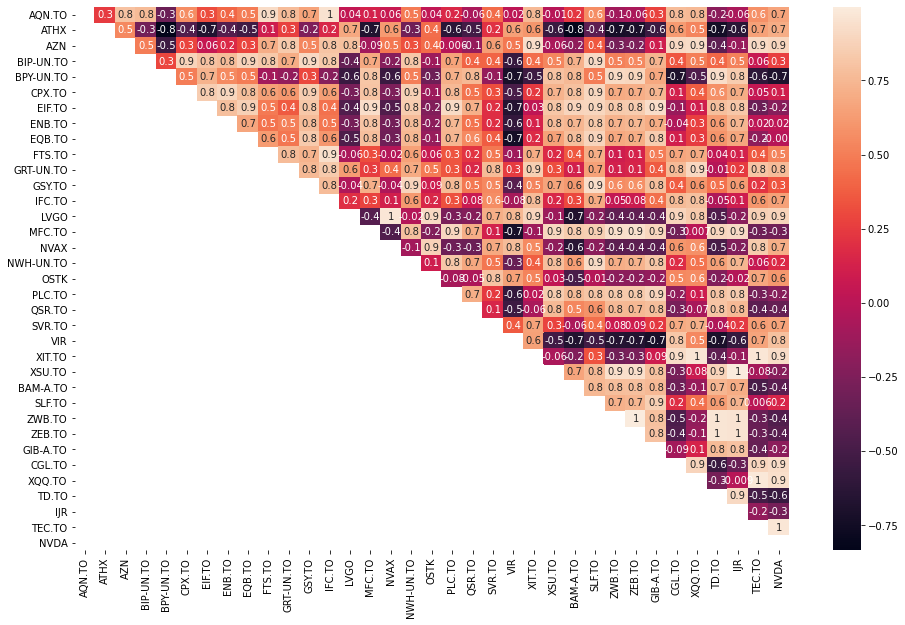

In [7]:
df_correlation = dfAP.corr()
mask = np.tril(df_correlation)
sns.heatmap(df_correlation, fmt='.1g', annot = True, mask = mask)

In [8]:
dfAP.tail(50)

,AQN.TO,ATHX,AZN,BIP-UN.TO,BPY-UN.TO,CPX.TO,EIF.TO,ENB.TO,EQB.TO,FTS.TO,...,SLF.TO,ZWB.TO,ZEB.TO,GIB-A.TO,CGL.TO,XQQ.TO,TD.TO,IJR,TEC.TO,NVDA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-08,19.112741,2.91,52.162994,59.540001,18.559999,28.785437,31.244802,44.505867,79.202499,53.395943,...,52.380001,15.563990,25.418007,92.570000,14.190000,78.000267,64.829384,75.284538,19.410980,352.200012
2020-06-09,18.954702,2.87,52.311802,57.799999,17.360001,28.559553,29.470648,43.464909,78.496315,52.513939,...,51.650002,15.484885,25.160160,91.269997,14.350000,78.649185,64.049736,73.451004,19.640755,361.839996
2020-06-10,18.767033,2.80,53.214584,57.270000,16.129999,28.048859,28.760986,42.325748,75.054893,52.018429,...,51.130001,15.267344,24.703962,92.150002,14.560000,79.667496,62.796375,70.780418,19.920481,374.670013
2020-06-11,18.026228,2.76,51.161003,54.340000,14.670000,26.506958,25.311245,40.695568,68.549995,50.006664,...,49.310001,14.674054,23.652731,89.199997,14.480000,75.793938,60.023186,65.000801,19.241146,351.850006
2020-06-12,18.529976,2.84,51.061794,54.660000,15.140000,27.135504,27.183962,41.373177,72.260002,50.928310,...,50.150002,14.990476,24.138678,89.489998,14.480000,76.343025,61.592358,66.644997,19.400990,357.299988
2020-06-15,18.974457,3.20,52.222515,55.680000,15.110000,28.039038,26.405308,41.491016,72.800003,51.731033,...,49.849998,14.881706,24.019669,89.070000,14.450000,77.181625,61.039692,68.120003,19.530861,366.950012
2020-06-16,18.786787,3.03,53.155064,56.770000,15.220000,28.117605,27.006548,42.620361,74.529999,51.820225,...,50.560001,15.138799,24.436195,89.010002,14.450000,78.669159,61.641701,69.849998,19.830568,362.739990
2020-06-17,18.569485,2.94,53.472523,57.150002,14.810000,27.754229,27.154392,42.011497,73.129997,51.542740,...,49.980000,15.089357,24.277519,87.120003,14.490000,78.888786,61.128513,68.330002,20.010393,369.440002
2020-06-18,18.618872,2.87,52.242355,57.799999,14.830000,28.009577,27.262814,42.531979,72.050003,52.087799,...,50.119999,15.089357,24.257683,87.750000,14.460000,79.078476,60.990349,68.059998,20.110292,368.720001


In [9]:
#dfAP = dfAP.drop(['XIC.TO', 'ZFL.TO', 'VUS.TO', 'XAR'], axis=1)

In [10]:
number_of_assets = len(dfAP.columns)

In [11]:
number_of_assets

35

In [12]:
# Complete the following functions
def strat_buy_and_hold(x_init, cash_init, mu, Q, cur_prices, number_of_assets):

    x_optimal = x_init
    cash_optimal = cash_init
    print (cash_optimal)
    weights_array = (x_init*cur_prices)/np.dot(x_init,cur_prices)
    ret_bh = np.dot(mu, weights_array)
    var_bh = np.dot(weights_array.T, np.dot(Q, weights_array))
    return x_optimal, cash_optimal, ret_bh, var_bh

In [13]:
def strat_equally_weighted(x_init, cash_init, mu, Q, cur_prices, number_of_assets):
    weights_array = [0.05]*number_of_assets
    x_optimal = np.dot(weights_array, np.dot(x_init,cur_prices))
    x_optimal = np.divide(x_optimal, cur_prices) 
    x_optimal = np.floor(x_optimal)
    
    #Compute the net_change in positions from the min_variance reccomended positions to the last positions 
    net_change = x_init-x_optimal
    
    #Calculate the change in price associated with this change
    net_change_price = np.dot(net_change,cur_prices)
    
    #Set cash account equal to the sum of the net of the price changes
    cash_optimal = np.sum(net_change_price)
    #print (cash_optimal)
    
    #Add previous cash_optimal value to the current cash_optimal value (linking previous periods cash amount to this period)
    cash_optimal = cash_optimal + cash_init
    
    print ('Before Cash_Optimization]', cash_optimal)
    
    ##################### CASH VALIDATION SECTION #####################
    
    #What to do if Cash_Optimal is 0?
    #Revert as many times as possible most bought current positions to the previous position until Cash Account > 0
    #Doing so would reduce the biggest subtraction from your cash_account, thus bringing it to positive the quickest
    counter = 0
    loop_break = 0
    if cash_optimal < 0:
        #Loop Condition Variable
        while loop_break == 0:
            #Sort positions based on greatest greatest change (most negative) to least (most positive)
            #since net_change is defined as intial_positions - current_suggested_positions, the most bought assets will
            #be the most negative and the one's we want to rectify first
            position_sort = np.argsort(net_change)
            #update cash_account such that reverted positions have their cash value of the transaction added back to the 
            #cash account
            cash_optimal = cash_optimal + np.absolute(net_change[position_sort[counter]]*cur_prices[position_sort[counter]])
            #Update the position array with the new positions
            x_optimal[position_sort[counter]] = x_init[position_sort[counter]]
            #Update counter so if cash_optimal is still negative the loop will continue to the next most bought asset
            #and revert its position
            counter = counter + 1
            #loop break condition is when cash_optimal is greater than 0
            if cash_optimal > 0:
                loop_break = 1
    
    #Recalculate Net-Change as we have potentially changed the positions based on the above loop
    net_change = x_init-x_optimal
    
    #Transaction costs for the required transactions above to get to an equally weighted portfolio
    transaction_cost = 0
    cash_optimal = cash_optimal - transaction_cost
    
    #Cash account may now be negative due to the addition of transaction costs, so this needs to be corrected
    #Similar to above revert most bought position to previous position and repeat until cash_optimal > 0
    counter_2 = 0
    loop_break_2 = 0
    if cash_optimal < 0:
        while loop_break_2 == 0:
            position_sort_2 = np.argsort(net_change)
            cash_optimal = cash_optimal + np.absolute(net_change[position_sort_2[counter_2]]*cur_prices[position_sort_2[counter_2]]*1)
            x_optimal[position_sort_2[counter_2]] = x_init[position_sort_2[counter_2]]
            counter_2 = counter_2 + 1
            if cash_optimal > 0:
                loop_break_2 = 1
    
    #Next up Optimize the Cash Account as reverting positions means we have massive values in the Cash Account
    #this is obviously undesirable as it could be invested in
    
    #First Possible Scenario, Cash Account is positive and no adjustments to the positions from min_variance 
    #reccomended positions was required
    if (cash_optimal > 0 and counter == 0 and counter_2 == 0):
        extra_purchase = np.floor(np.divide(cash_optimal,(cur_prices[np.argmax(mu)]))*1)
        #need to find the position of the min price asset and add the extra purchase to this number of shares
        position = np.argmax(mu)
        x_optimal[position] = x_optimal[position] + extra_purchase
        cash_optimal = cash_optimal - np.dot(extra_purchase,(cur_prices[np.argmax(mu)]))*1
        #...Need to add in transaction costs here as well...
        transaction_cost_3 = 0
        cash_optimal = cash_optimal - transaction_cost_3
    
    #Second Possible Scenario, Cash Account is positive and adjustments to the positions from min_variance
    #reccomended positions was required as the price of shares bought > price of shares sold
    elif (cash_optimal > 0 and counter > 0 and counter_2 < 1):        
        #Look to invest as many times as possible into the asset's position that was reverted back to previous position
        #in order to allow for cash positive account. Doing so preserves the reccomended positions as much as possible
        extra_purchase = np.floor(cash_optimal/((cur_prices[position_sort[counter-1]])*1))
        #Add these extra purchases to the array holding the positions
        x_optimal[position_sort[counter-1]] = x_optimal[position_sort[counter-1]] + extra_purchase
        #Update cash account such that the extra positions and their associated transaction costs are subtracted from
        #the cash account
        cash_optimal = cash_optimal - extra_purchase*cur_prices[position_sort[counter-1]]*1
    
    #Third Possible Scenario, Cash Account is positive and adjustments to the positions from min_variance
    #reccomended positions was required as the transaction fee of 0.5% for all transactions resulted in negative
    #cash account
    elif (cash_optimal > 0 and counter_2 > 0 and counter < 1):
        #Look to invest as many times as possible into the asset's position that was reverted back to previous position
        #in order to allow for cash positive account. Doing so preserves the reccomended positions as much as possible
        extra_purchase = np.floor(cash_optimal/((cur_prices[position_sort_2[counter_2-1]])*1))
        #Add these extra purchases to the array holding the positions
        x_optimal[position_sort_2[counter_2-1]] = x_optimal[position_sort_2[counter_2-1]] + extra_purchase
        #Update cash account such that the extra positions and their associated transaction costs are subtracted from
        #the cash account
        cash_optimal = cash_optimal - extra_purchase*cur_prices[position_sort_2[counter_2-1]]*1
    
    print ('After Cash Optimization', cash_optimal)
    
    ret_eq_w = np.dot(mu, weights_array)
    #print ('Return of Equally Weighted')
    #print (ret_eq_w)
    
    var_eq_w = np.dot(weights_array, np.dot(Q, weights_array))
    #print ('STD of Equally Weighted')
    #print(var_eq_w)
    
    return (x_optimal, cash_optimal, ret_eq_w, var_eq_w)

In [14]:
def strat_min_variance(x_init, cash_init, mu, Q, cur_prices, number_of_assets):
    
    #Define Cplex
    cpx = cplex.Cplex()
    cpx.objective.set_sense(cpx.objective.sense.minimize)
    
    n = len(x_init)
    c  = [0.0] * n
    lb = [0.0] * n
    ub = [1.0] * n
    
    A = []
    for k in range(n):
        A.append([[0],[1.0]])

    var_names = ["w_%s" % i for i in range(1,n+1)]
    
    #Right hand constraint is equal to 1
    #Lower bound handles the case of weights needing to be greater than 0
    cpx.linear_constraints.add(rhs=[1.0], senses="E")

    cpx.variables.add(obj=c, lb=lb, ub=ub, columns=A, names=var_names)
    
    Qmat = [[list(range(n)), list(2*Q[k,:])] for k in range(n)]
    
    cpx.objective.set_quadratic(Qmat)
    
    cpx.parameters.threads.set(4)
    
    cpx.set_results_stream(None)
    cpx.set_warning_stream(None)
    
    cpx.solve()
    
    #Get Solution Weights
    w_cur = cpx.solution.get_values()
    
    #Store in an weights array
    weights_array = [0.00]*number_of_assets
    weights_array = w_cur
    weights_array = np.asarray(weights_array)
    
    #Compute the positions of the assets in the portfolio based on the Minimum Variance weights identified above
    x_optimal = weights_array*np.dot(x_init,cur_prices)
    x_optimal = np.divide(x_optimal, cur_prices) 
    x_optimal = np.floor(x_optimal)
    
    #Compute the net_change in positions from the min_variance reccomended positions to the last positions 
    net_change = x_init-x_optimal
    
    #Calculate the change in price associated with this change
    net_change_price = np.dot(net_change,cur_prices)
    
    #Set cash account equal to the sum of the net of the price changes
    cash_optimal = np.sum(net_change_price)
    #print (cash_optimal)
    
    #Add previous cash_optimal value to the current cash_optimal value (linking previous periods cash amount to this period)
    cash_optimal = cash_optimal + cash_init
        
    print ('Before Cash_Optimization]', cash_optimal)
    
    ##################### CASH VALIDATION SECTION #####################
    
    #What to do if Cash_Optimal is 0?
    #Revert as many times as possible most bought current positions to the previous position until Cash Account > 0
    #Doing so would reduce the biggest subtraction from your cash_account, thus bringing it to positive the quickest
    counter = 0
    loop_break = 0
    if cash_optimal < 0:
        #Loop Condition Variable
        while loop_break == 0:
            #Sort positions based on greatest greatest change (most negative) to least (most positive)
            #since net_change is defined as intial_positions - current_suggested_positions, the most bought assets will
            #be the most negative and the one's we want to rectify first
            position_sort = np.argsort(net_change)
            #update cash_account such that reverted positions have their cash value of the transaction added back to the 
            #cash account
            cash_optimal = cash_optimal + np.absolute(net_change[position_sort[counter]]*cur_prices[position_sort[counter]])
            #Update the position array with the new positions
            x_optimal[position_sort[counter]] = x_init[position_sort[counter]]
            #Update counter so if cash_optimal is still negative the loop will continue to the next most bought asset
            #and revert its position
            counter = counter + 1
            #loop break condition is when cash_optimal is greater than 0
            if cash_optimal > 0:
                loop_break = 1
    
    #Recalculate Net-Change as we have potentially changed the positions based on the above loop
    net_change = x_init-x_optimal
    
    #Transaction costs for the required transactions above to get to an equally weighted portfolio
    transaction_cost = 0
    cash_optimal = cash_optimal - transaction_cost
    
    #Cash account may now be negative due to the addition of transaction costs, so this needs to be corrected
    #Similar to above revert most bought position to previous position and repeat until cash_optimal > 0
    counter_2 = 0
    loop_break_2 = 0
    if cash_optimal < 0:
        while loop_break_2 == 0:
            position_sort_2 = np.argsort(net_change)
            cash_optimal = cash_optimal + np.absolute(net_change[position_sort_2[counter_2]]*cur_prices[position_sort_2[counter_2]]*1)
            x_optimal[position_sort_2[counter_2]] = x_init[position_sort_2[counter_2]]
            counter_2 = counter_2 + 1
            if cash_optimal > 0:
                loop_break_2 = 1
    
    #Next up Optimize the Cash Account as reverting positions means we have massive values in the Cash Account
    #this is obviously undesirable as it could be invested in
    
    #First Possible Scenario, Cash Account is positive and no adjustments to the positions from min_variance 
    #reccomended positions was required
    if (cash_optimal > 0 and counter == 0 and counter_2 == 0):
        extra_purchase = np.floor(np.divide(cash_optimal,(cur_prices[np.argmax(mu)]))*1)
        #need to find the position of the min price asset and add the extra purchase to this number of shares
        position = np.argmax(mu)
        x_optimal[position] = x_optimal[position] + extra_purchase
        cash_optimal = cash_optimal - np.dot(extra_purchase,(cur_prices[np.argmax(mu)]))*1
        #...Need to add in transaction costs here as well...
        transaction_cost_3 = 0
        cash_optimal = cash_optimal - transaction_cost_3
    
    #Second Possible Scenario, Cash Account is positive and adjustments to the positions from min_variance
    #reccomended positions was required as the price of shares bought > price of shares sold
    elif (cash_optimal > 0 and counter > 0 and counter_2 < 1):        
        #Look to invest as many times as possible into the asset's position that was reverted back to previous position
        #in order to allow for cash positive account. Doing so preserves the reccomended positions as much as possible
        extra_purchase = np.floor(cash_optimal/((cur_prices[position_sort[counter-1]])*1))
        #Add these extra purchases to the array holding the positions
        x_optimal[position_sort[counter-1]] = x_optimal[position_sort[counter-1]] + extra_purchase
        #Update cash account such that the extra positions and their associated transaction costs are subtracted from
        #the cash account
        cash_optimal = cash_optimal - extra_purchase*cur_prices[position_sort[counter-1]]*1
    
    #Third Possible Scenario, Cash Account is positive and adjustments to the positions from min_variance
    #reccomended positions was required as the transaction fee of 0.5% for all transactions resulted in negative
    #cash account
    elif (cash_optimal > 0 and counter_2 > 0 and counter < 1):
        #Look to invest as many times as possible into the asset's position that was reverted back to previous position
        #in order to allow for cash positive account. Doing so preserves the reccomended positions as much as possible
        extra_purchase = np.floor(cash_optimal/((cur_prices[position_sort_2[counter_2-1]])*1))
        #Add these extra purchases to the array holding the positions
        x_optimal[position_sort_2[counter_2-1]] = x_optimal[position_sort_2[counter_2-1]] + extra_purchase
        #Update cash account such that the extra positions and their associated transaction costs are subtracted from
        #the cash account
        cash_optimal = cash_optimal - extra_purchase*cur_prices[position_sort_2[counter_2-1]]*1
    
    print ('After Cash Optimization', cash_optimal)

    
    #print ('Mean Variance Returns')
    ret_minVar = np.dot(mu, weights_array)
    #print ('Return of Min_Var')
    #print (ret_minVar)
    
    var_minVar = np.dot(weights_array, np.dot(Q, weights_array))
    #print ('STD of Min_Var')
    #print(var_minVar)
    
    #Return optimal positions and cash value
    return (x_optimal, cash_optimal, ret_minVar, var_minVar)

In [15]:
def strat_max_Sharpe(x_init, cash_init, mu, Q, cur_prices, number_of_assets):
    
    #Pad the Q array to get Q~
    Q_2 = np.pad(Q, ((0,1),(0,1)), 'constant')

    #Define Cplex Model
    cpx = cplex.Cplex()
    cpx.objective.set_sense(cpx.objective.sense.minimize)
    
    n = len(x_init)
    
    #Set constants, lower and upper bounds
    c  = [0.0] * (n+1)
    lb = [0.0] * (n+1)
    ub = [cplex.infinity] * (n+1)
    
    #Risk Free Rate (convert to a daily Risk Free Rate)
    r_rf = (1+0.045)**(1/252)-1

    #Need to check if all mu's are negative. If they are the solution will be infeasible
    #If this is the case revert to the previous positions stored in x_init
    check_constraint = 0
    for check in range(n):
        if (mu[check]-r_rf < 0):
            check_constraint = check_constraint + 1
        if check_constraint == number_of_assets:
            x_optimal = x_init
            cash_optimal = cash_init
            weights_array = [0]*number_of_assets
            weights_array = x_optimal*cur_prices/(np.dot(x_optimal,cur_prices))
            ret_max_sharpe = np.dot(mu,weights_array)    
            var_max_sharpe = np.dot(weights_array, np.dot(Q, weights_array))
            return (x_optimal, cash_optimal, ret_max_sharpe, var_max_sharpe)
    
    #Setup A array that holds linear constraints
    A = []
    for k in range(n+1):
        if (k < number_of_assets):
            A.append([[0,1],[1,((mu[k]-r_rf))]])
        else:
            #Append kappa as the last column in the sparse matrix
            A.append([[0,1],[-1,0]])

    #Setup up variable names
    var_names = ["w_%s" % i for i in range(1,n+2)]
    
    #Set RHS constraints
    cpx.linear_constraints.add(rhs=[0,1], senses="EE")

    cpx.variables.add(obj=c, lb=lb, ub=ub, columns=A, names=var_names)
    
    Qmat = [[list(range(n+1)), list(2*Q_2[k,:])] for k in range(n+1)]
    
    cpx.objective.set_quadratic(Qmat)
        
    cpx.parameters.threads.set(6)
    
    cpx.set_results_stream(None)
    cpx.set_warning_stream(None)
    
    #Solve optimization probelm
    cpx.solve()
    
    #Store y values in an array
    y = cpx.solution.get_values()
    
    #Kappa is the last entry in the list
    kappa = y[-1]
    #Everything else is a y value
    y_list = y[:number_of_assets]
    
    #Convert list to float array
    y_array = np.asarray(y_list)
    y_array = y_array.astype(float)
    
    #Compute the w_maxsharpe values
    w_maxsharpe = y_array/kappa
    
    #Store in an weights array as per previous formatting in Min_Variance function
    weights_array = [0.00]*number_of_assets
    weights_array = w_maxsharpe
    
    #Compute the positions of the assets in the portfolio based on the Minimum Variance weights identified above
    x_optimal = weights_array*np.dot(x_init,cur_prices)
    x_optimal = np.divide(x_optimal, cur_prices) 
    x_optimal = np.floor(x_optimal)
    
    #Compute the net_change in positions from the min_variance reccomended positions to the last positions 
    net_change = x_init-x_optimal
    
    #Calculate the change in price associated with this change
    net_change_price = np.dot(net_change,cur_prices)
    
    #Set cash account equal to the sum of the net of the price changes
    cash_optimal = np.sum(net_change_price)
    #print (cash_optimal)
    
    #Add previous cash_optimal value to the current cash_optimal value (linking previous periods cash amount to this period)
    cash_optimal = cash_optimal + cash_init
    
    
     ##################### CASH VALIDATION SECTION #####################
    
    #What to do if Cash_Optimal is 0?
    #Revert as many times as possible most bought current positions to the previous position until Cash Account > 0
    #Doing so would reduce the biggest subtraction from your cash_account, thus bringing it to positive the quickest
    counter = 0
    loop_break = 0
    if cash_optimal < 0:
        #Loop Condition Variable
        while loop_break == 0:
            #Sort positions based on greatest greatest change (most negative) to least (most positive)
            #since net_change is defined as intial_positions - current_suggested_positions, the most bought assets will
            #be the most negative and the one's we want to rectify first
            position_sort = np.argsort(net_change)
            #update cash_account such that reverted positions have their cash value of the transaction added back to the 
            #cash account
            cash_optimal = cash_optimal + np.absolute(net_change[position_sort[counter]]*cur_prices[position_sort[counter]])
            #Update the position array with the new positions
            x_optimal[position_sort[counter]] = x_init[position_sort[counter]]
            #Update counter so if cash_optimal is still negative the loop will continue to the next most bought asset
            #and revert its position
            counter = counter + 1
            #loop break condition is when cash_optimal is greater than 0
            if cash_optimal > 0:
                loop_break = 1
    
    #Recalculate Net-Change as we have potentially changed the positions based on the above loop
    net_change = x_init-x_optimal
    
    #Transaction costs for the required transactions above to get to an equally weighted portfolio
    transaction_cost = 0
    cash_optimal = cash_optimal - transaction_cost
    
    #Cash account may now be negative due to the addition of transaction costs, so this needs to be corrected
    #Similar to above revert most bought position to previous position and repeat until cash_optimal > 0
    counter_2 = 0
    loop_break_2 = 0
    if cash_optimal < 0:
        while loop_break_2 == 0:
            position_sort_2 = np.argsort(net_change)
            cash_optimal = cash_optimal + np.absolute(net_change[position_sort_2[counter_2]]*cur_prices[position_sort_2[counter_2]]*1)
            x_optimal[position_sort_2[counter_2]] = x_init[position_sort_2[counter_2]]
            counter_2 = counter_2 + 1
            if cash_optimal > 0:
                loop_break_2 = 1
    
    #Next up Optimize the Cash Account as reverting positions means we have massive values in the Cash Account
    #this is obviously undesirable as it could be invested in
    
    #First Possible Scenario, Cash Account is positive and no adjustments to the positions from min_variance 
    #reccomended positions was required
    if (cash_optimal > 0 and counter == 0 and counter_2 == 0):
        extra_purchase = np.floor(np.divide(cash_optimal,(cur_prices[np.argmax(mu)]))*1)
        #need to find the position of the min price asset and add the extra purchase to this number of shares
        position = np.argmax(mu)
        x_optimal[position] = x_optimal[position] + extra_purchase
        cash_optimal = cash_optimal - np.dot(extra_purchase,(cur_prices[np.argmax(mu)]))*1
        #...Need to add in transaction costs here as well...
        transaction_cost_3 = 0
        cash_optimal = cash_optimal - transaction_cost_3
    
    #Second Possible Scenario, Cash Account is positive and adjustments to the positions from min_variance
    #reccomended positions was required as the price of shares bought > price of shares sold
    elif (cash_optimal > 0 and counter > 0 and counter_2 < 1):        
        #Look to invest as many times as possible into the asset's position that was reverted back to previous position
        #in order to allow for cash positive account. Doing so preserves the reccomended positions as much as possible
        extra_purchase = np.floor(cash_optimal/((cur_prices[position_sort[counter-1]])*1))
        #Add these extra purchases to the array holding the positions
        x_optimal[position_sort[counter-1]] = x_optimal[position_sort[counter-1]] + extra_purchase
        #Update cash account such that the extra positions and their associated transaction costs are subtracted from
        #the cash account
        cash_optimal = cash_optimal - extra_purchase*cur_prices[position_sort[counter-1]]*1
    
    #Third Possible Scenario, Cash Account is positive and adjustments to the positions from min_variance
    #reccomended positions was required as the transaction fee of 0.5% for all transactions resulted in negative
    #cash account
    elif (cash_optimal > 0 and counter_2 > 0 and counter < 1):
        #Look to invest as many times as possible into the asset's position that was reverted back to previous position
        #in order to allow for cash positive account. Doing so preserves the reccomended positions as much as possible
        extra_purchase = np.floor(cash_optimal/((cur_prices[position_sort_2[counter_2-1]])*1))
        #Add these extra purchases to the array holding the positions
        x_optimal[position_sort_2[counter_2-1]] = x_optimal[position_sort_2[counter_2-1]] + extra_purchase
        #Update cash account such that the extra positions and their associated transaction costs are subtracted from
        #the cash account
        cash_optimal = cash_optimal - extra_purchase*cur_prices[position_sort_2[counter_2-1]]*1
    
    #print ('After Cash Optimization', cash_optimal)
    
    ret_max_sharpe = np.dot(mu, weights_array)
    
    var_max_sharpe = np.dot(weights_array, np.dot(Q, weights_array))
    
    print ('Max Sharpe Return = ', ret_max_sharpe)
    
    return (x_optimal, cash_optimal, ret_max_sharpe, var_max_sharpe)

In [16]:
def strat_equal_risk_contr(x_init, cash_init, mu, Q, cur_prices, number_of_assets):
    
    #init_positions = np.array([255, 0, 0, 0, 0, 109, 0, 0, 439, 0, 0, 0, 0, 0, 0])
    #init_positions = np.array([48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48])
    init_positions = np.array([0, 0, 0, 0, 0, 202, 0, 0, 540, 0, 0, 0, 0, 0, 0])
    #init_positions = np.array([41, 41, 41, 41, 41, 41, 41, 41, 65, 65, 65, 65, 65, 65, 65])
    #init_positions = np.array([0, 0, 0, 0, 0, 67, 0, 0, 1081, 0, 0, 0, 0, 0, 0])
    #init_positions = np.array([0, 0, 0, 0, 0, 0, 0, 0, 162, 162, 162, 162, 162, 162, 162])

    #if x_init[0] == init_positions[0]:
    #    #Assume equally weighted to start
    #    x_init_2 = x_init
    #    weights_array = [0.05]*15
    #    x_init = np.dot(weights_array, np.dot(x_init,cur_prices))
    #    x_init = np.divide(x_init, cur_prices) 
    #    x_init = np.floor(x_init)
    
###### CLASS DEFINITION ######
    class erc(object):
        def __init__(self):
            pass

        def objective(self, x):
            # The callback for calculating the objective
            y = x * np.dot(Q, x)
            fval = 0
            for i in range(n):
                for j in range(i,n):
                    xij = y[i] - y[j]
                    fval = fval + xij*xij
            fval = 2*fval
            return fval

        def gradient(self, x):
            # The callback for calculating the gradient
            grad = np.zeros(n)
            # Insert your gradient computations here
            # You can use finite differences to check the gradient
            y = x * np.dot(Q,x)
            ys = np.dot(Q,x)
            for i in range (n):
                #Decalre Variable to store the sum of the difference achieved through differentiaiton specifcally through
                #the chain rule portion
                sum_of_chain = 0
                #Cycle through all values of array so in range (n)
                for j in range (n):
                    xij1 = y[i] - y[j]
                    sum_of_chain = sum_of_chain + xij1
                grad[i] = ys[i]*sum_of_chain
            grad = 4*grad
            return grad

        def constraints(self, x):
            # The callback for calculating the constraints
            return [1.0] * n
    
        def jacobian(self, x):
            # The callback for calculating the Jacobian
            return np.array([[1.0] * n])

        def intermediate(
                self,
                alg_mod,
                iter_count,
                obj_value,
                inf_pr,
                inf_du,
                mu,
                d_norm,
                regularization_size,
                alpha_du,
                alpha_pr,
                ls_trials
                ):

            # Example for the use of the intermediate callback.
            #print("Objective value at iteration #%d is - %g" % (iter_count, obj_value))
            return
            
###### CLASS DEFINITION ######
    
    # Use "1/n portfolio" w0 as initial portfolio for starting IPOPT optimization
    
    n = len(x_init)
    
    w0 = x_init*cur_prices/(np.dot(x_init,cur_prices)+cash_init)
    lb = [0.0] * n  # lower bounds on variables
    ub = [1.0] * n  # upper bounds on variables
    cl = [1]        # lower bounds on constraints
    cu = [1]        # upper bounds on constraints

    # Define IPOPT problem
    nlp = ipopt.problem(n=len(w0), m=len(cl), problem_obj=erc(), lb=lb, ub=ub, cl=cl, cu=cu)
 
    # Set the IPOPT options
    nlp.addOption('jac_c_constant'.encode('utf-8'), 'yes'.encode('utf-8'))
    nlp.addOption('hessian_approximation'.encode('utf-8'), 'limited-memory'.encode('utf-8'))
    nlp.addOption('mu_strategy'.encode('utf-8'), 'adaptive'.encode('utf-8'))
    nlp.addOption('tol'.encode('utf-8'), 1e-10)

    # Solve the problem
    w_erc, info = nlp.solve(w0)

    #print("\nOptimal solution: w = %s\n" % repr(w_erc))
    #print("Objective function value = %s\n" % repr(info['obj_val']))
    # Check constraint sum(w) = 1
    #print (np.allclose(np.around(np.sum(w_erc), decimals = 2),1))
    #print (np.sum(w_erc))
    
    # Compute variance and asset risk contributions for the ERC portfolio
    var_ERC = np.dot(w_erc, np.dot(Q, w_erc))
    std_ERC = np.sqrt(var_ERC)
    RC_ERC = (w_erc * np.dot(Q, w_erc)) / std_ERC
    
    #Store in an weights array as per previous formatting in Min_Variance function
    weights_array = [0.00]*number_of_assets
    weights_array = w_erc
    
    #Compute the positions of the assets in the portfolio based on the Minimum Variance weights identified above
    x_optimal = weights_array*np.dot(x_init,cur_prices)
    x_optimal = np.divide(x_optimal, cur_prices) 
    x_optimal = np.floor(x_optimal)
    
    if x_init[0] == init_positions[0]:
        #net_change = x_init_2-x_optimal
        net_change = x_init-x_optimal
    else:
        #Compute the net_change in positions from the min_variance reccomended positions to the last positions 
        net_change = x_init-x_optimal
    
    #Calculate the change in price associated with this change
    net_change_price = np.dot(net_change,cur_prices)
    
    #Set cash account equal to the sum of the net of the price changes
    cash_optimal = np.sum(net_change_price)
    #print (cash_optimal)
    
    #Add previous cash_optimal value to the current cash_optimal value (linking previous periods cash amount to this period)
    cash_optimal = cash_optimal + cash_init
    #print ("Cash Optimal = ")
    #print (cash_optimal)
    
    print ('Before Cash_Optimization]', cash_optimal)
    
    ##################### CASH VALIDATION SECTION #####################
    
    #What to do if Cash_Optimal is 0?
    #Revert as many times as possible most bought current positions to the previous position until Cash Account > 0
    #Doing so would reduce the biggest subtraction from your cash_account, thus bringing it to positive the quickest
    counter = 0
    loop_break = 0
    if cash_optimal < 0:
        #Loop Condition Variable
        while loop_break == 0:
            #Sort positions based on greatest greatest change (most negative) to least (most positive)
            #since net_change is defined as intial_positions - current_suggested_positions, the most bought assets will
            #be the most negative and the one's we want to rectify first
            position_sort = np.argsort(net_change)
            #update cash_account such that reverted positions have their cash value of the transaction added back to the 
            #cash account
            cash_optimal = cash_optimal + np.absolute(net_change[position_sort[counter]]*cur_prices[position_sort[counter]])
            #Update the position array with the new positions
            x_optimal[position_sort[counter]] = x_init[position_sort[counter]]
            #Update counter so if cash_optimal is still negative the loop will continue to the next most bought asset
            #and revert its position
            counter = counter + 1
            #loop break condition is when cash_optimal is greater than 0
            if cash_optimal > 0:
                loop_break = 1
    
    #Recalculate Net-Change as we have potentially changed the positions based on the above loop
    net_change = x_init-x_optimal
    
    #Transaction costs for the required transactions above to get to an equally weighted portfolio
    transaction_cost = 0
    cash_optimal = cash_optimal - transaction_cost
    
    #Cash account may now be negative due to the addition of transaction costs, so this needs to be corrected
    #Similar to above revert most bought position to previous position and repeat until cash_optimal > 0
    counter_2 = 0
    loop_break_2 = 0
    if cash_optimal < 0:
        while loop_break_2 == 0:
            position_sort_2 = np.argsort(net_change)
            cash_optimal = cash_optimal + np.absolute(net_change[position_sort_2[counter_2]]*cur_prices[position_sort_2[counter_2]]*1)
            x_optimal[position_sort_2[counter_2]] = x_init[position_sort_2[counter_2]]
            counter_2 = counter_2 + 1
            if cash_optimal > 0:
                loop_break_2 = 1
    
    #Next up Optimize the Cash Account as reverting positions means we have massive values in the Cash Account
    #this is obviously undesirable as it could be invested in
    
    #First Possible Scenario, Cash Account is positive and no adjustments to the positions from min_variance 
    #reccomended positions was required
    if (cash_optimal > 0 and counter == 0 and counter_2 == 0):
        extra_purchase = np.floor(np.divide(cash_optimal,(cur_prices[np.argmax(mu)]))*1)
        #need to find the position of the min price asset and add the extra purchase to this number of shares
        position = np.argmax(mu)
        x_optimal[position] = x_optimal[position] + extra_purchase
        cash_optimal = cash_optimal - np.dot(extra_purchase,(cur_prices[np.argmax(mu)]))*1
        #...Need to add in transaction costs here as well...
        transaction_cost_3 = 0
        cash_optimal = cash_optimal - transaction_cost_3
    
    #Second Possible Scenario, Cash Account is positive and adjustments to the positions from min_variance
    #reccomended positions was required as the price of shares bought > price of shares sold
    elif (cash_optimal > 0 and counter > 0 and counter_2 < 1):        
        #Look to invest as many times as possible into the asset's position that was reverted back to previous position
        #in order to allow for cash positive account. Doing so preserves the reccomended positions as much as possible
        extra_purchase = np.floor(cash_optimal/((cur_prices[position_sort[counter-1]])*1))
        #Add these extra purchases to the array holding the positions
        x_optimal[position_sort[counter-1]] = x_optimal[position_sort[counter-1]] + extra_purchase
        #Update cash account such that the extra positions and their associated transaction costs are subtracted from
        #the cash account
        cash_optimal = cash_optimal - extra_purchase*cur_prices[position_sort[counter-1]]*1
    
    #Third Possible Scenario, Cash Account is positive and adjustments to the positions from min_variance
    #reccomended positions was required as the transaction fee of 0.5% for all transactions resulted in negative
    #cash account
    elif (cash_optimal > 0 and counter_2 > 0 and counter < 1):
        #Look to invest as many times as possible into the asset's position that was reverted back to previous position
        #in order to allow for cash positive account. Doing so preserves the reccomended positions as much as possible
        extra_purchase = np.floor(cash_optimal/((cur_prices[position_sort_2[counter_2-1]])*1))
        #Add these extra purchases to the array holding the positions
        x_optimal[position_sort_2[counter_2-1]] = x_optimal[position_sort_2[counter_2-1]] + extra_purchase
        #Update cash account such that the extra positions and their associated transaction costs are subtracted from
        #the cash account
        cash_optimal = cash_optimal - extra_purchase*cur_prices[position_sort_2[counter_2-1]]*1
    
    print ('After Cash Optimization', cash_optimal)

    
    ret_eq_risk = np.dot(mu, weights_array)
    
    var_eq_risk = np.dot(weights_array, np.dot(Q, weights_array))
    
    return (x_optimal, cash_optimal, ret_eq_risk, var_eq_risk)

In [17]:
def strat_robust_optim(x_init, cash_init, mu, Q, cur_prices, return_target, number_of_assets):
    
    n = len(x_init)
    
    cpx = cplex.Cplex()
    cpx.objective.set_sense(cpx.objective.sense.minimize)
    
    c  = [0.0] * n
    lb = [0.0] * n
    ub = [1.0] * n
    
    A = []
    for k in range(n):
        A.append([[0,1],[1.0,mu[k]]])
    
    var_names = ["w_%s" % i for i in range(1,n+1)]
    
    var_matr = np.diag(np.diag(Q))
    
    # Target portfolio return estimation error is return estimation error of 1/n portfolio
    weights_array_0 = [0.05]*number_of_assets
    rob_init = np.dot(weights_array_0, np.dot(var_matr, weights_array_0)) # return estimation error of initial portfolio
    rob_bnd  = rob_init # target return estimation error
    
    #Need to add in Portf_Retn Here
    cpx.linear_constraints.add(rhs=[1.0,return_target], senses="EG")
    
    cpx.variables.add(obj=c, lb=lb, ub=ub, columns=A, names=var_names)
    
    Qmat = [[list(range(n)), list(2*Q[k,:])] for k in range(n)]
    
    cpx.objective.set_quadratic(Qmat)
    
    Qcon = cplex.SparseTriple(ind1=var_names, ind2=range(n), val=np.diag(var_matr))
    cpx.quadratic_constraints.add(rhs=rob_bnd, quad_expr=Qcon, name="Qc")
    
    cpx.parameters.threads.set(4)
    cpx.parameters.timelimit.set(60)
    cpx.parameters.barrier.qcpconvergetol.set(1e-12)
    
    cpx.set_results_stream(None)
    cpx.set_warning_stream(None)
    
    start = time.time()
    cpx.solve()
    duration = time.time() - start
    
    w_rMV = cpx.solution.get_values()
    card_rMV = np.count_nonzero(w_rMV)
    ret_rMV  = np.dot(mu, w_rMV)
    var_rMV = np.dot(w_rMV, np.dot(Q, w_rMV))
    rob_rMV = np.dot(w_rMV, np.dot(var_matr, w_rMV))
    
    # Round near-zero portfolio weights
    w_rMV = np.array(w_rMV)
    w_rMV_nonrnd = copy.deepcopy(w_rMV)
    w_rMV[w_rMV<1e-6] = 0
    w_rMV = w_rMV / np.sum(w_rMV)
    
    #Store in an weights array as per previous formatting in Min_Variance function
    weights_array = [0.00]*number_of_assets
    weights_array = w_rMV
    
    #Compute the positions of the assets in the portfolio based on the Minimum Variance weights identified above
    x_optimal = weights_array*np.dot(x_init,cur_prices)
    x_optimal = np.divide(x_optimal, cur_prices) 
    x_optimal = np.floor(x_optimal)
    
    #Compute the net_change in positions from the min_variance reccomended positions to the last positions 
    net_change = x_init-x_optimal
    
    #Calculate the change in price associated with this change
    net_change_price = np.dot(net_change,cur_prices)
    
    #Set cash account equal to the sum of the net of the price changes
    cash_optimal = np.sum(net_change_price)
    #print (cash_optimal)
    
    #Add previous cash_optimal value to the current cash_optimal value (linking previous periods cash amount to this period)
    cash_optimal = cash_optimal + cash_init
    
    print ('Before Cash_Optimization]', cash_optimal)
    
    ##################### CASH VALIDATION SECTION #####################
    
    #What to do if Cash_Optimal is 0?
    #Revert as many times as possible most bought current positions to the previous position until Cash Account > 0
    #Doing so would reduce the biggest subtraction from your cash_account, thus bringing it to positive the quickest
    counter = 0
    loop_break = 0
    if cash_optimal < 0:
        #Loop Condition Variable
        while loop_break == 0:
            #Sort positions based on greatest greatest change (most negative) to least (most positive)
            #since net_change is defined as intial_positions - current_suggested_positions, the most bought assets will
            #be the most negative and the one's we want to rectify first
            position_sort = np.argsort(net_change)
            #update cash_account such that reverted positions have their cash value of the transaction added back to the 
            #cash account
            cash_optimal = cash_optimal + np.absolute(net_change[position_sort[counter]]*cur_prices[position_sort[counter]])
            #Update the position array with the new positions
            x_optimal[position_sort[counter]] = x_init[position_sort[counter]]
            #Update counter so if cash_optimal is still negative the loop will continue to the next most bought asset
            #and revert its position
            counter = counter + 1
            #loop break condition is when cash_optimal is greater than 0
            if cash_optimal > 0:
                loop_break = 1
    
    #Recalculate Net-Change as we have potentially changed the positions based on the above loop
    net_change = x_init-x_optimal
    
    #Transaction costs for the required transactions above to get to an equally weighted portfolio
    transaction_cost = 0
    cash_optimal = cash_optimal - transaction_cost
    
    #Cash account may now be negative due to the addition of transaction costs, so this needs to be corrected
    #Similar to above revert most bought position to previous position and repeat until cash_optimal > 0
    counter_2 = 0
    loop_break_2 = 0
    if cash_optimal < 0:
        while loop_break_2 == 0:
            position_sort_2 = np.argsort(net_change)
            cash_optimal = cash_optimal + np.absolute(net_change[position_sort_2[counter_2]]*cur_prices[position_sort_2[counter_2]]*1)
            x_optimal[position_sort_2[counter_2]] = x_init[position_sort_2[counter_2]]
            counter_2 = counter_2 + 1
            if cash_optimal > 0:
                loop_break_2 = 1
    
    #Next up Optimize the Cash Account as reverting positions means we have massive values in the Cash Account
    #this is obviously undesirable as it could be invested in
    
    #First Possible Scenario, Cash Account is positive and no adjustments to the positions from min_variance 
    #reccomended positions was required
    if (cash_optimal > 0 and counter == 0 and counter_2 == 0):
        extra_purchase = np.floor(np.divide(cash_optimal,(cur_prices[np.argmax(mu)]))*1)
        #need to find the position of the min price asset and add the extra purchase to this number of shares
        position = np.argmax(mu)
        x_optimal[position] = x_optimal[position] + extra_purchase
        cash_optimal = cash_optimal - np.dot(extra_purchase,(cur_prices[np.argmax(mu)]))*1
        #...Need to add in transaction costs here as well...
        transaction_cost_3 = 0
        cash_optimal = cash_optimal - transaction_cost_3
    
    #Second Possible Scenario, Cash Account is positive and adjustments to the positions from min_variance
    #reccomended positions was required as the price of shares bought > price of shares sold
    elif (cash_optimal > 0 and counter > 0 and counter_2 < 1):        
        #Look to invest as many times as possible into the asset's position that was reverted back to previous position
        #in order to allow for cash positive account. Doing so preserves the reccomended positions as much as possible
        extra_purchase = np.floor(cash_optimal/((cur_prices[position_sort[counter-1]])*1))
        #Add these extra purchases to the array holding the positions
        x_optimal[position_sort[counter-1]] = x_optimal[position_sort[counter-1]] + extra_purchase
        #Update cash account such that the extra positions and their associated transaction costs are subtracted from
        #the cash account
        cash_optimal = cash_optimal - extra_purchase*cur_prices[position_sort[counter-1]]*1
    
    #Third Possible Scenario, Cash Account is positive and adjustments to the positions from min_variance
    #reccomended positions was required as the transaction fee of 0.5% for all transactions resulted in negative
    #cash account
    elif (cash_optimal > 0 and counter_2 > 0 and counter < 1):
        #Look to invest as many times as possible into the asset's position that was reverted back to previous position
        #in order to allow for cash positive account. Doing so preserves the reccomended positions as much as possible
        extra_purchase = np.floor(cash_optimal/((cur_prices[position_sort_2[counter_2-1]])*1))
        #Add these extra purchases to the array holding the positions
        x_optimal[position_sort_2[counter_2-1]] = x_optimal[position_sort_2[counter_2-1]] + extra_purchase
        #Update cash account such that the extra positions and their associated transaction costs are subtracted from
        #the cash account
        cash_optimal = cash_optimal - extra_purchase*cur_prices[position_sort_2[counter_2-1]]*1
    
    print ('After Cash Optimization', cash_optimal)

    
    ret_Rob = np.dot(mu, weights_array)
    
    var_Rob = np.dot(weights_array, np.dot(Q, weights_array))
    
    return (x_optimal, cash_optimal, ret_Rob, var_Rob)

In [18]:
def e_frontier(mu, Q, cur_prices, return_max_ret, var_max_ret, return_min_var, var_min_var, return_eq_w, var_eq_w, return_max_sharpe, var_max_sharpe, return_eq_risk, var_eq_risk, return_rob, var_rob, return_bh, var_bh, number_of_assets, x_init):
    
    # Target returns for Effecient Frontier
    targetRet = np.linspace(return_min_var,return_max_ret,50)
    targetRet = targetRet.reshape(50,)
    
    #50% Variance
    middle_var_50 = ((np.sqrt(var_max_ret)+np.sqrt(var_min_var))/2)**2
    #25% Variance
    middle_var_25 = ((np.sqrt(middle_var_50)+np.sqrt(var_min_var))/2)**2
    #75% Variance
    middle_var_75 = ((np.sqrt(var_max_ret)+np.sqrt(middle_var_50))/2)**2
    
    # Define optimization problem and compute one portfolio on efficient frontier
    n = len(mu)
    w = cp.Variable(n)
    eps = cp.Parameter()
    eps.value = targetRet[0]
    prob3 = cp.Problem(cp.Minimize(cp.quad_form(w, Q)),
                     [mu.T@w >= eps,
                      sum(w) == 1,
                      w >= 0])
    prob3.solve(solver=cp.CPLEX, verbose=False,cplex_params={"qpmethod": 6})

    # Compute efficient frontier
    w_front = []
    var_front = []
    ret_front = []
    for epsilon in targetRet:
        eps.value = epsilon
        prob3.solve(solver=cp.CPLEX, verbose=False,cplex_params={"qpmethod": 6})
        w_front.append(w.value)
        var_front.append(np.dot(w.value, np.dot(Q, w.value)))
        ret_front.append(np.dot(mu, w.value))

    
    
    #Bonus Generate large number of scenarios to approximate the effecient frontier
    #Generate Random Numbers for Weights make use of the dirichlet random number generator with a factor derived from a unifrom
    #number generator
    variance_random = [0]*1000000
    return_random = [0]*1000000
    random_weights = [0]*number_of_assets
    dirichlet_input = 0
    dirichlet_switch = 0
    
    random_weights_best_25 = [0]*number_of_assets
    
    random_weights_best_50 = [0]*number_of_assets
    
    random_weights_best_75 = [0]*number_of_assets
    
    return_random_best_50 = 0
    variance_random_best_50 = 0

    return_random_best_25 = 0
    variance_random_best_25 = 0
    
    return_random_best_75 = 0
    variance_random_best_75 = 0

    for x in range (len(return_random)):
        #Scale the Dirichlet Function by a factor which is a unifrom random number itself
        dirichlet_switch = random.randint(1, 3)
        if dirichlet_switch == 1:
            dirichlet_input = np.random.uniform(500, 700)
        elif dirichlet_switch == 2:
            dirichlet_input = np.random.uniform(5, number_of_assets)
        elif dirichlet_switch == 3:
            dirichlet_input = np.random.uniform(5, number_of_assets)
        #Use Dirichlet Function to generate with a another random number scaling its value for random numbers 
        random_weights = np.random.dirichlet(np.ones(number_of_assets)/dirichlet_input,size=1)
        #print (np.sum(random_weights))
        variance_random[x] = np.dot(random_weights, np.dot(Q, random_weights.T))
        return_random[x] = np.dot(mu,random_weights.T)
        
        if variance_random[x] < 1.01*middle_var_25 and variance_random[x] > 0.99*middle_var_25 and return_random[x] > return_random_best_25: #and return_random[x] > return_eq_w and return_random[x] > return_random_best:
            random_weights_best_25 = random_weights
            return_random_best_25 = return_random[x]
            variance_random_best_25 = variance_random[x]
            
        elif variance_random[x] < 1.01*middle_var_50 and variance_random[x] > 0.99*middle_var_50 and return_random[x] > return_random_best_50: #and return_random[x] > return_eq_w and return_random[x] > return_random_best:
            random_weights_best_50 = random_weights
            return_random_best_50 = return_random[x]
            variance_random_best_50 = variance_random[x]
            
        elif variance_random[x] < 1.01*middle_var_75 and variance_random[x] > 0.99*middle_var_75 and return_random[x] > return_random_best_75: #and return_random[x] > return_eq_w and return_random[x] > return_random_best:
            random_weights_best_75 = random_weights
            return_random_best_75 = return_random[x]
            variance_random_best_75 = variance_random[x]
            
    #This is how you calculate positions from Weights for 25% Var
    x_optimal_25 = np.dot(random_weights_best_25, np.dot(x_init,cur_prices))
    x_optimal_25 = np.divide(x_optimal_25, cur_prices) 
    x_optimal_25 = np.floor(x_optimal_25)
    x_optimal_25 = x_optimal_25.ravel()
    print('25% Variance Weights ', x_optimal_25)
    
    #This is how you calculate positions from Weights for 50% Var
    x_optimal_50 = np.dot(random_weights_best_50, np.dot(x_init,cur_prices))
    x_optimal_50 = np.divide(x_optimal_50, cur_prices) 
    x_optimal_50 = np.floor(x_optimal_50)
    x_optimal_50 = x_optimal_50.ravel()
    print('50% Variance Weights ', x_optimal_50)
    
    #This is how you calculate positions from Weights for 75% Var
    x_optimal_75 = np.dot(random_weights_best_75, np.dot(x_init,cur_prices))
    x_optimal_75 = np.divide(x_optimal_75, cur_prices) 
    x_optimal_75 = np.floor(x_optimal_75)
    x_optimal_75 = x_optimal_75.ravel()
    print('75% Variance Weights ', x_optimal_75)
    
    ax = plt.gca()
    plt.rcParams['figure.figsize'] = [16, 9]
    
    for x in range (500):
        ax.scatter(x=np.sqrt(variance_random[x]), y=return_random[x], color='Red')
    
    # Plot efficient frontier
    ax.plot(np.sqrt(var_front), ret_front, 'k-', label='efficient frontier')
    
    #Plot EF at 25% Variance Portfolio
    ax.scatter(x=np.sqrt(variance_random_best_25), y=return_random_best_25, marker='*', s=400,  color='c', label='Variance at 25% and Associated Return')
    
    #Plot EF at 50% Variance Portfolio
    ax.scatter(x=np.sqrt(variance_random_best_50), y=return_random_best_50, marker='*', s=400,  color='Orange', label='Variance at 50% and Associated Return')
    
    #Plot EF at 75% Variance Portfolio
    ax.scatter(x=np.sqrt(variance_random_best_75), y=return_random_best_75, marker='*', s=400,  color='Green', label='Variance at 75% and Associated Return')

    # Plot volatility versus expected return for individual stocks (NOT NEEDED FOR THIS GRAPH)
    ax.scatter(x=np.sqrt(np.diag(Q)), y=mu, color='Blue', label='individual stocks')

    # Plot volatility versus expected return for minimum variance portfolio
    ax.scatter(x=np.sqrt(var_min_var), y=return_min_var, marker='D', s=50,  color='DarkGreen', label='minimum variance portfolio')

    # Plot volatility versus expected return for maximum return portfolio
    ax.scatter(x=np.sqrt(var_max_ret), y=return_max_ret,  marker='s', s=50, color='DarkMagenta', label='maximum return portfolio')
    
    # Plot volatility versus expected return for Equal Weight
    ax.scatter(x=np.sqrt(var_eq_w), y=return_eq_w,  marker='^', s=50, color='blue', label='Equal Weight Portfolio')
    
    # Plot volatility versus expected return for Max Sharpe
    ax.scatter(x=np.sqrt(var_max_sharpe), y=return_max_sharpe,  marker='v', s=50, color='Orange', label='Max Sharpe Portfolio')
    
    # Plot volatility versus expected return for Equal Risk portfolio
    ax.scatter(x=np.sqrt(var_eq_risk), y=return_eq_risk,  marker='8', s=50, color='cyan', label='Equal Risk Portfolio')
    
    # Plot volatility versus expected return for Robust portfolio
    ax.scatter(x=np.sqrt(var_rob), y=return_rob,  marker='p', s=50, color='yellow', label='Robust Portfolio')
    
    # Plot volatility versus expected return for Buy and Hold portfolio
    ax.scatter(x=np.sqrt(var_bh), y=return_bh,  marker='*', s=400, color='DarkMagenta', label='Buy and Hold Portfolio')
    
    
    # Format and display the final plot
    ax.axis([0, 1.2*np.max(np.sqrt(np.diag(Q))), np.min(mu)-0.1*(np.max(mu)-np.min(mu)), 1.1*return_max_ret])
    ax.set_xlabel('Volatility (Standard Deviation of 2 Month Return)')
    ax.set_ylabel('Expected 2 Month Return')
    plt.title('Portfolio and Frontiers Plot')
    ax.legend(loc="lower right")
    ax.grid()
    plt.show()
    
    return (x_optimal_25, x_optimal_50, x_optimal_75)

In [19]:
def max_return_plotting(weights_array, mu, Q, cur_prices, number_of_assets):
   
    cpx = cplex.Cplex()
    cpx.objective.set_sense(cpx.objective.sense.maximize)

    n = len(weights_array)
    c  = mu * n
    lb = [0.0] * n
    ub = [1.0] * n

    A = []
    for k in range(n):
        A.append([[0],[1.0]])

    var_names = ["w_%s" % i for i in range(1,n+1)]

    #Right hand constraint is equal to 1
    #Lower bound handles the case of weights needing to be greater than 0
    cpx.linear_constraints.add(rhs=[1.0], senses="E")

    cpx.variables.add(obj=c, lb=lb, ub=ub, columns=A, names=var_names)

    #Qmat = [[list(range(n)), list(2*Q[k,:])] for k in range(n)]

    #cpx.objective.set_quadratic(Qmat)

    cpx.parameters.threads.set(4)

    cpx.set_results_stream(None)
    cpx.set_warning_stream(None)

    cpx.solve()

    #Get Solution Weights
    w_cur = cpx.solution.get_values()

    #Store in an weights array
    weights_array = w_cur
    print (weights_array)
   
    ret_max_sharpe = np.dot(mu, weights_array)
   
    var_max_sharpe = np.dot(weights_array, np.dot(Q, weights_array))

    #Return min_var return and variance
   
    '''
    n = len(weights_array)
    w2 = cp.Variable(n)
    prob2 = cp.Problem(cp.Maximize(mu.T@w2),
                 [sum(w2) == 1,
                  w2 >= 0])
    prob2.solve(solver=cp.CPLEX, verbose=True,cplex_params={"qpmethod": 6})

    weights_array = w2.value
    weights_array = np.asarray(weights_array)
    weights_array = weights_array.reshape(number_of_assets,1)
   
    print ("MAX RETURN", weights_array)
   
    ret_max_sharpe = np.dot(mu, weights_array)
   
    var_max_sharpe = np.dot(weights_array.T, np.dot(Q, weights_array))
   
    #Return variance and return
    '''
    return (ret_max_sharpe, var_max_sharpe)

In [20]:
def min_return_plotting(weights_array, mu, Q, cur_prices, number_of_assets):
    
    #Define Cplex
    cpx = cplex.Cplex()
    cpx.objective.set_sense(cpx.objective.sense.minimize)
    
    n = len(weights_array)
    c  = [0.0] * n
    lb = [0.0] * n
    ub = [1.0] * n
    
    A = []
    for k in range(n):
        A.append([[0],[1.0]])

    var_names = ["w_%s" % i for i in range(1,n+1)]
    
    #Right hand constraint is equal to 1
    #Lower bound handles the case of weights needing to be greater than 0
    cpx.linear_constraints.add(rhs=[1.0], senses="E")

    cpx.variables.add(obj=c, lb=lb, ub=ub, columns=A, names=var_names)
    
    Qmat = [[list(range(n)), list(2*Q[k,:])] for k in range(n)]
    
    cpx.objective.set_quadratic(Qmat)
    
    cpx.parameters.threads.set(4)
    
    cpx.set_results_stream(None)
    cpx.set_warning_stream(None)
    
    cpx.solve()
    
    #Get Solution Weights
    w_cur = cpx.solution.get_values()
    
    #Store in an weights array
    weights_array = w_cur
    weights_array = np.asarray(weights_array)
    weights_array = weights_array.reshape(number_of_assets,1)
    
    ret_min_var = np.dot(mu, weights_array)
    
    var_min_var = np.dot(weights_array.T, np.dot(Q, weights_array))
    
    #Return min_var return and variance
    return (ret_min_var, var_min_var)

In [21]:
df = dfAP.copy()

In [22]:
df.head()

,AQN.TO,ATHX,AZN,BIP-UN.TO,BPY-UN.TO,CPX.TO,EIF.TO,ENB.TO,EQB.TO,FTS.TO,...,SLF.TO,ZWB.TO,ZEB.TO,GIB-A.TO,CGL.TO,XQQ.TO,TD.TO,IJR,TEC.TO,NVDA
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-03,13.215905,1.93,37.215252,49.123562,21.584311,24.854229,27.652109,39.499222,68.183022,44.019825,...,46.208832,16.590353,26.267456,85.000000,10.46,56.543125,67.701843,77.583130,NaN,169.200043
2018-12-04,13.066784,1.87,37.506878,48.840160,21.417923,24.711237,27.009655,38.962910,66.154808,44.094997,...,44.974213,16.372894,25.865929,84.400002,10.50,54.450035,66.571297,74.082260,NaN,156.333908
2018-12-05,13.197264,NaN,NaN,48.944080,21.639776,24.684425,26.474283,39.776310,65.465797,44.010437,...,45.209824,16.418198,25.912615,84.910004,10.47,55.289246,66.765915,NaN,NaN,NaN
2018-12-06,13.281145,1.88,36.566143,48.641773,21.612043,24.675491,26.144133,38.301464,63.534630,44.076206,...,43.447426,16.155434,25.567114,85.019997,10.49,54.785713,65.366653,73.819702,NaN,157.508072
2018-12-07,13.476868,1.86,35.917042,47.489265,21.140612,25.444084,25.894295,37.926048,60.846504,43.728558,...,42.938496,16.073891,25.399035,83.290001,10.64,53.087547,64.708725,72.429070,NaN,146.880844


In [23]:
df = df.reset_index()
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')
df = df.fillna(method='bfill')

In [24]:
df.head()

,Date,AQN.TO,ATHX,AZN,BIP-UN.TO,BPY-UN.TO,CPX.TO,EIF.TO,ENB.TO,EQB.TO,...,SLF.TO,ZWB.TO,ZEB.TO,GIB-A.TO,CGL.TO,XQQ.TO,TD.TO,IJR,TEC.TO,NVDA
0,12/03/2018,13.215905,1.93,37.215252,49.123562,21.584311,24.854229,27.652109,39.499222,68.183022,...,46.208832,16.590353,26.267456,85.000000,10.46,56.543125,67.701843,77.583130,14.731558,169.200043
1,12/04/2018,13.066784,1.87,37.506878,48.840160,21.417923,24.711237,27.009655,38.962910,66.154808,...,44.974213,16.372894,25.865929,84.400002,10.50,54.450035,66.571297,74.082260,14.731558,156.333908
2,12/05/2018,13.197264,1.88,36.566143,48.944080,21.639776,24.684425,26.474283,39.776310,65.465797,...,45.209824,16.418198,25.912615,84.910004,10.47,55.289246,66.765915,73.819702,14.731558,157.508072
3,12/06/2018,13.281145,1.88,36.566143,48.641773,21.612043,24.675491,26.144133,38.301464,63.534630,...,43.447426,16.155434,25.567114,85.019997,10.49,54.785713,65.366653,73.819702,14.731558,157.508072
4,12/07/2018,13.476868,1.86,35.917042,47.489265,21.140612,25.444084,25.894295,37.926048,60.846504,...,42.938496,16.073891,25.399035,83.290001,10.64,53.087547,64.708725,72.429070,14.731558,146.880844


In [25]:
# Convert dates into array [year month day]
def convert_date_to_array(datestr):
    temp = [int(x) for x in datestr.split('/')]
    return [temp[-1], temp[0], temp[1]]

In [26]:
dates_array = np.array(list(df['Date'].apply(convert_date_to_array)))
data_prices = df.iloc[:, 1:].to_numpy()
dates = np.array(df['Date'])

In [27]:
# Find the number of trading days in Dec 2018 and
# compute expected return and covariance matrix for period 1
day_ind_start0 = 0
day_ind_end0 = len(np.where(dates_array[:,0]==2018)[0])
cur_returns0 = data_prices[day_ind_start0+1:day_ind_end0,:] / data_prices[day_ind_start0:day_ind_end0-1,:] - 1
mu = np.mean(cur_returns0, axis = 0)
Q = np.cov(cur_returns0.T)

In [28]:
# Remove datapoints for year 2018
data_prices = data_prices[day_ind_end0:,:]
dates_array = dates_array[day_ind_end0:,:]
dates = dates[day_ind_end0:]

In [29]:
# Initial positions in the portfolio
#init_positions = np.array([255, 0, 0, 0, 0, 109, 0, 0, 439, 0, 0, 0, 0, 0, 0])
#init_positions = np.array([48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48])
#init_positions = np.array([0, 0, 0, 0, 0, 202, 0, 0, 540, 0, 0, 0, 0, 0, 0])
#init_positions = np.array([0, 0, 0, 0, 0, 67, 0, 0, 1081, 0, 0, 0, 0, 0, 0])
#init_positions = np.array([41, 41, 41, 41, 41, 41, 41, 41, 65, 65, 65, 65, 65, 65, 65])
#print(df.iloc[0,1:].sum())
init_position_value = 10000/df.iloc[0,1:].sum()
#init_positions = 
init_positions = np.array(np.floor([init_position_value]*number_of_assets))
print(init_positions)

[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]


In [30]:
print(len(data_prices[0]))
print (number_of_assets)

35
35


In [31]:
# Initial value of the portfolio
init_value = np.dot(data_prices[0,:], init_positions)
print('\nInitial portfolio value = $ {}\n'.format(round(init_value, 2)))
init_value_SPY = init_value


Initial portfolio value = $ 7923.6



In [32]:
# Initial portfolio weights
w_init = (data_prices[0,:] * init_positions) / init_value

In [33]:
# Number of periods, assets, trading days
N_periods = 20 # 6 periods per year
N = len(df.columns)-1
N_days = len(dates)

In [34]:
N_periods

20

In [35]:
# Annual risk-free rate for years 2015-2016 is 2.5%
r_rf = 0.025

In [36]:
# Annual risk-free rate for years 2008-2009 is 4.5%
r_rf2008_2009 = 0.045

In [37]:
# Number of strategies
strategy_functions = ['strat_buy_and_hold', 'strat_equally_weighted', 'strat_min_variance', 'strat_max_Sharpe', 'strat_equal_risk_contr', 'strat_robust_optim']
strategy_names     = ['Buy and Hold', 'Equally Weighted Portfolio', 'Mininum Variance Portfolio', 'Maximum Sharpe Ratio Portfolio', 'Equal Risk Contributions Portfolio', 'Robust Optimization Portfolio']
N_strat = 6  # comment this in your code
#N_strat = len(strategy_functions)  # uncomment this in your code
fh_array = [strat_buy_and_hold, strat_equally_weighted, strat_min_variance, strat_max_Sharpe, strat_equal_risk_contr, strat_robust_optim]

In [38]:
portf_value = 9*[0] #[0] * N_strat
x = np.zeros((N_strat, N_periods),  dtype=np.ndarray)
cash = np.zeros((N_strat, N_periods),  dtype=np.ndarray)

In [39]:
all_prices = np.zeros((N_strat, N_periods),  dtype=np.ndarray)

In [40]:
dates_array[:,1]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

In [41]:
13%12

1

In [42]:
plt.rcParams['figure.figsize'] = [16, 9]


Period 1: start date 01/02/2019, end date 01/31/2019
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 7923.60, value end = $ 8555.76
Before Cash_Optimization] -5190.86555147171
After Cash Optimization 5.322956085205078
[ 6.  6.  6.  8.  6.  6.  6.  8.  6.  9.  7. 10.  4. 10.  6. 10.  6.  6.
  6.  5.  6.  6.  6.  6.  7.  9.  6.  6.  4.  6.  7.  6.  5.  6.  2.]
  Strategy "Equally Weighted Portfolio", value begin = $ 7923.60, value end = $ 8576.93
Before Cash_Optimization] 36.90220928192139
After Cash Optimization 3.2222089767456055
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 207.
   0.   0.   0.   0.   0.   0.   4.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
  Strategy "Mininum Variance Portfolio", value begin = $ 7923.60, value end = $ 7924.20
Max Sharpe Return =  0.003291303068403923
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0

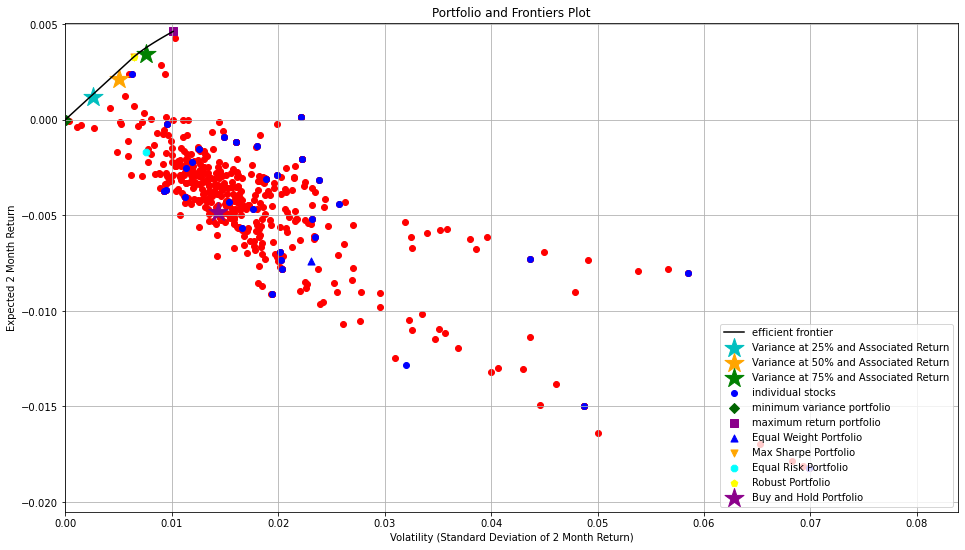

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 155.
   0.   0.   0.   0.   0.   0. 237.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  0.   0.   0.   0.  10.   0.   0.   0.   0.   0.   1.   0.   0.  31.
   0.   0.   0.   0.   0.   0.  99.   0.   0.   0.   0.   0.   0.   0.
   0. 513.   0.   0.   0.   0.   0.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 704. 141.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]

Period 2: start date 02/01/2019, end date 02/28/2019
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 8556.52, value end = $ 8748.68
Before Cash_Optimization] -5557.971046566963
After Cash Optimization 8.069561004638729
[ 6.  6.  6.  8.  6.  6.  6.  9.  6.  9.  7. 10.  4. 10.  6.  9.  6.  6.
  6.  5.  6.  6.  6.  6.  7.  9.  6.  6.  4.  6.  7.  6.  5.  6. 

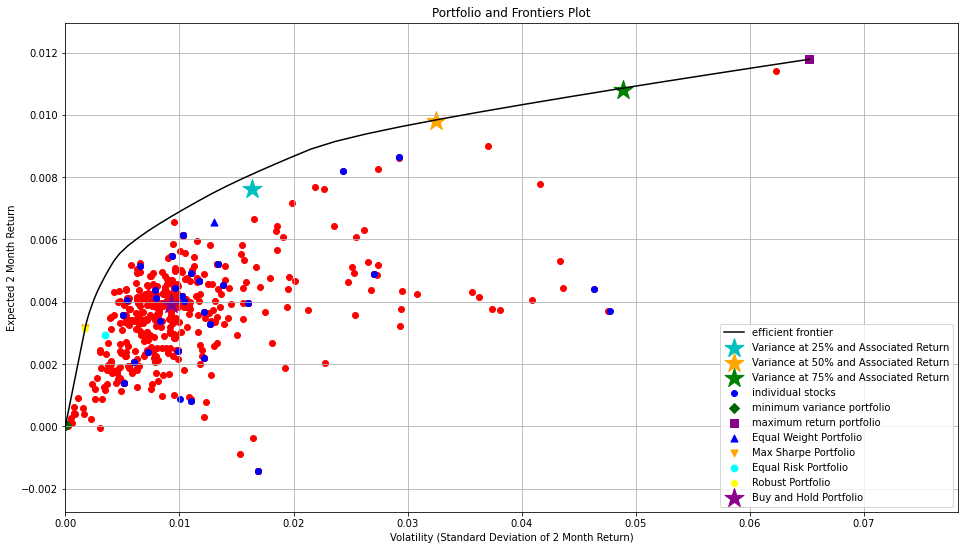

[ 0.  0.  0.  0.  0.  0.  0.  7.  0.  0.  0.  0.  0.  0.  0. 49.  0.  0.
  0. 57.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 17.  0.  0.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 218.   0.  60.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  58.   0. 333.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]

Period 3: start date 03/01/2019, end date 03/29/2019
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 8800.43, value end = $ 8951.53
Before Cash_Optimization] -5786.2694935798645
After Cash Optimization 8.069561004638729
[ 6.  6.  6.  8.  6.  6.  6.  9.  6.  9.  7. 10.  4. 10.  6.  9.  6.  6.
  6.  5.  6.  6.  6.  6.  7.  9.  6.  6.  4.  6.  7.  6.  5.  6.  2.]
  Strategy "Equally Weighted P

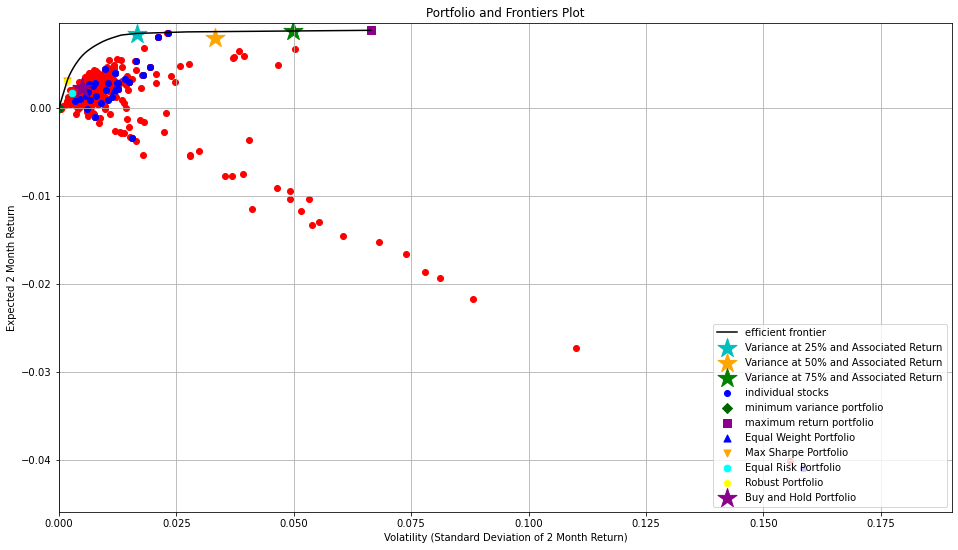

[  0.   0. 157.   0.   0.   0.  78.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  0.   2.   0.   0.   0.   0. 118.   0.   6.   0.   0.   0.   0.   0.
   0.   0.   0. 200.   0.   0.   0.   0.   1.   0.   4.   2.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  0.   0.  56.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 304.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]

Period 4: start date 04/01/2019, end date 04/30/2019
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 9027.39, value end = $ 9156.60
Before Cash_Optimization] -5906.439789772034
After Cash Optimization 19.58540725708005
[ 6.  6.  6.  8.  6.  6.  6.  9.  6.  9.  7. 10.  4. 11.  6.  9.  6.  6.
  6.  5.  6.  6.  6.  6.  7.  8.  6.  6.  4.  6.  7.  6.  5.  6. 

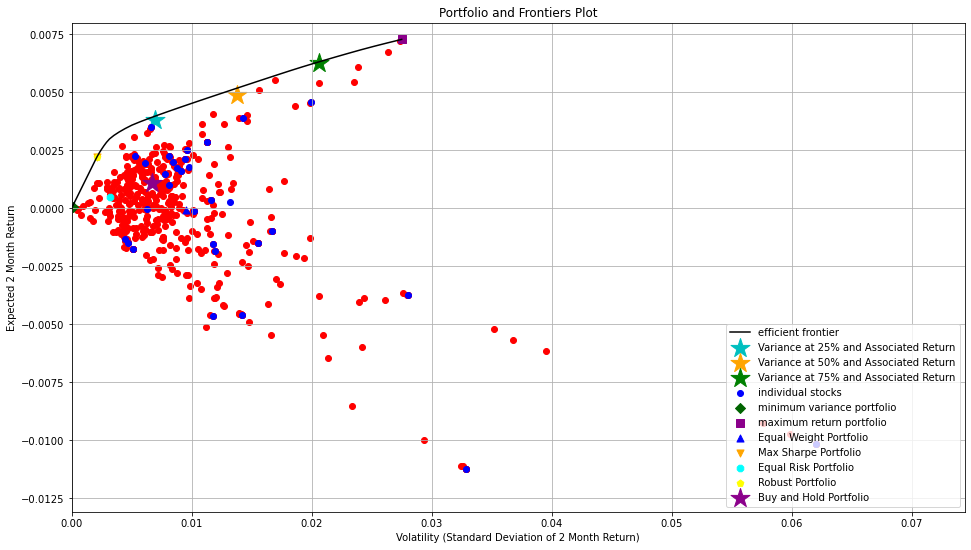

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. 596.   0.  94.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  1.   0.   0.   0.   0.  59.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   2. 243.   0.   5.   2.   3.   0.  11.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  20.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 125.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  30.]

Period 5: start date 05/01/2019, end date 05/31/2019
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 9140.46, value end = $ 8746.09
Before Cash_Optimization] -5973.521116733551
After Cash Optimization 32.10366058349615
[ 6.  6.  7.  8.  6.  6.  6.  9.  6.  9.  7.  9.  4. 11.  6.  9.  6.  6.
  6.  5.  6.  6.  6.  6.  7.  8.  6.  6.  4.  6.  7.  6.  5.  6. 

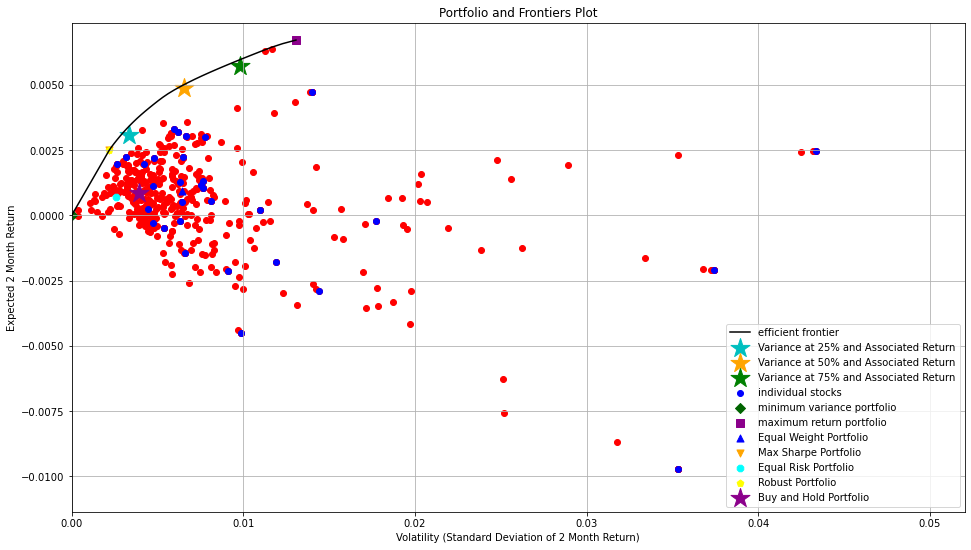

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  35.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.
   0.   0.   0.   0.   0.   0.   0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 88.  0.  0. 18.  0.  0.  0.
  1.  0.  0.  0.  1.  0.  0. 75.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[  0.   0.   0.   0.   5.   0.   0.   1.   0.   0.   0. 138.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  55.   0.   0.  11.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]

Period 6: start date 06/03/2019, end date 06/28/2019
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 8685.65, value end = $ 9213.76
Before Cash_Optimization] -5754.817829489708
After Cash Optimization 24.70721435546875
[ 6.  6.  8.  8.  6.  6.  6.  9.  6.  8.  7.  9.  3. 11.  6.  9.  6.  6.
  6.  5.  6.  6.  6.  6.  7.  8.  6.  6.  4.  6.  7.  6.  5.  6.  3.]
  Strategy "Equally Weighted Po

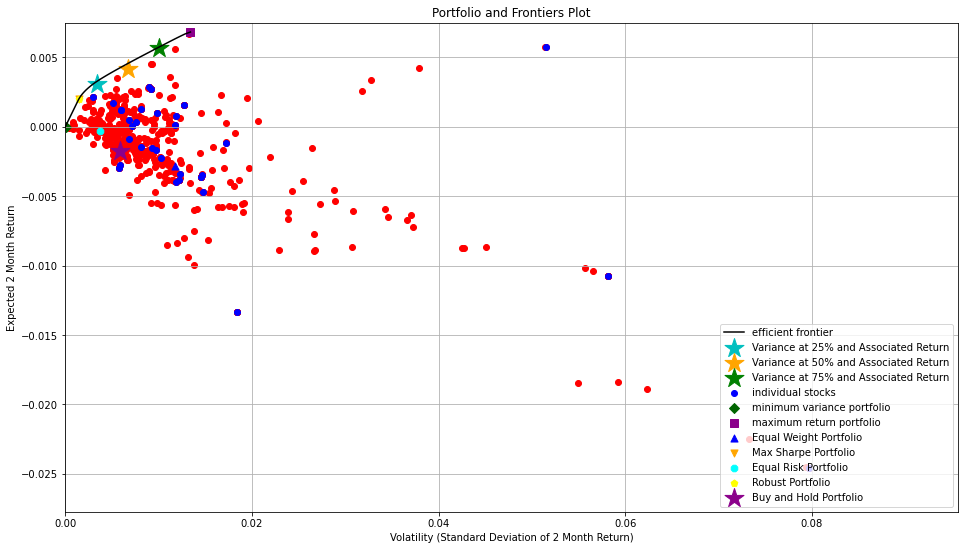

[  0.   0.   0.   0.   0.   0.   0.   0.   0. 139.   0.   0.   0.   0.
   0.   0.   0.   0.  62.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  0.   0.   0.   7.   0.  19.   4.   0.   0.  60.   0.   1.   0.   3.
   0.   0.   0.   0. 152.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. 219.   0. 220.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]

Period 7: start date 07/02/2019, end date 07/31/2019
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 9276.33, value end = $ 9576.42
Before Cash_Optimization] -5969.244744539261
After Cash Optimization 25.721488952636662
[ 6.  6. 11.  8.  6.  6.  6. 10.  6.  9.  7.  8.  3. 11.  6.  9.  6.  6.
  6.  5.  6.  6.  6.  6.  7.  8.  6.  6.  4.  6.  7.  6.  5.  6.

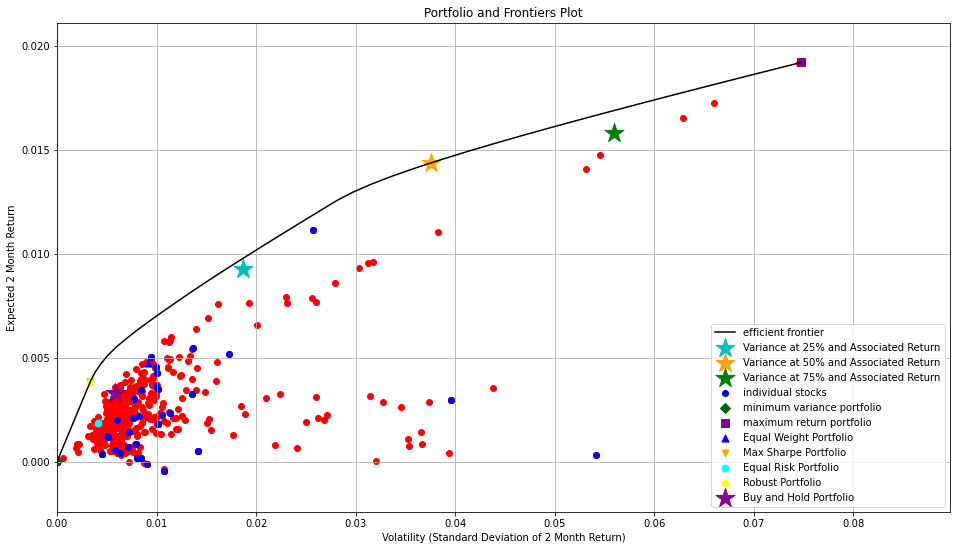

[  0. 101.   0.   0.   8.   0.   0.   0.   0.   0.   0.   2.  18.   0.
   0.   0.   1.  61.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  33.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 254.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  33.]
[  0. 296.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  16.
   0.   0.   0. 470.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   7.]

Period 8: start date 08/01/2019, end date 08/30/2019
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 9509.79, value end = $ 9623.60
Before Cash_Optimization] -6316.849639773369
After Cash Optimization 16.526649475097656
[ 6.  6. 11.  8.  6.  6.  6. 11.  5.  9.  8.  8.  3. 11.  6.  9.  6.  6.
  6.  5.  6.  6.  6.  6.  7.  8.  6.  6.  4.  6.  7.  6.  5.  6.

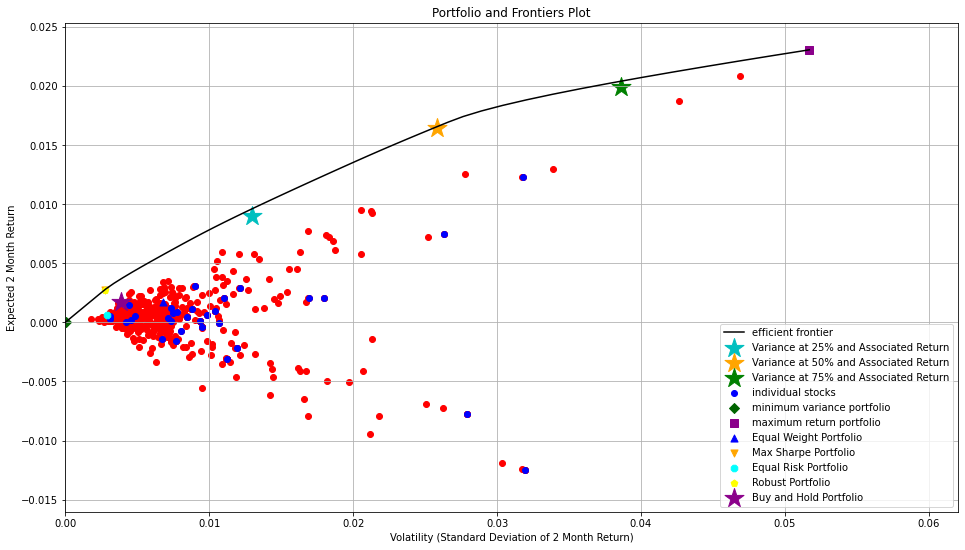

[  8.   0.  30.   1.   0.   0.   0.   0.  27.   0.   0.   0.   0.   0.
   0.   0.   0.  88.   0.   0. 287.   0.   0.   0.   6.   0.   0.  17.
   0.   0.   0.   0.   0.   0.   0.]
[  0.   0.   0.   0.   0.   0.   0.   0.  63.   0.   0.   0.   0.   0.
   0.   0.   0. 171.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  0.   0.   0.   6.   0.   0.   0.   0.  20.   0.   0.   0.   0.   0.
   1.   0.   0. 333.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]

Period 9: start date 09/03/2019, end date 09/30/2019
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 9552.12, value end = $ 9763.91
Before Cash_Optimization] -5991.280344963074
After Cash Optimization 8.734374999999943
[ 6.  6. 10.  7.  6.  6. 13. 11.  4.  8.  7.  9.  3. 15.  6.  9.  6.  6.
  6.  4.  6.  6.  6.  6.  6.  8.  6.  6.  4.  6.  7.  6.  6.  6. 

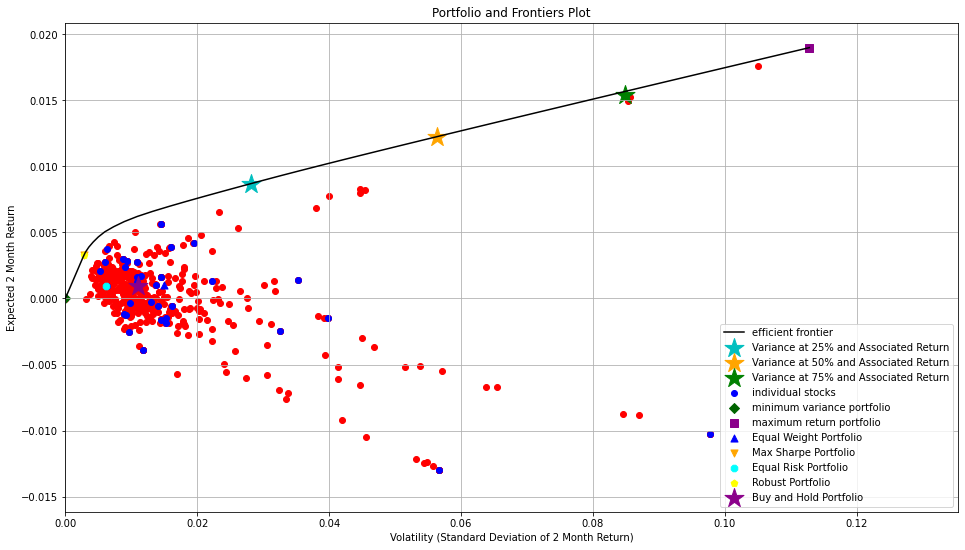

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 372.   0.   0.   0.   0. 712.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  0.   7.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 810.   0.   0.   0.   0. 459.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[   0.    0.    0.    0.    0.    0.    0.    0.   23.    0.    0.    0.
    0.    0.    0. 1250.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]

Period 10: start date 10/01/2019, end date 10/31/2019
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 9638.19, value end = $ 10045.11
Before Cash_Optimization] -6178.538120269775
After Cash Optimization 13.566402435302734
[ 6.  6. 11.  7.  6.  6. 12. 10.  4.  8.  7.  8.  3. 15.  6.  9.  6.  6.
  6.  5.  6.  6.  6.  6.  6

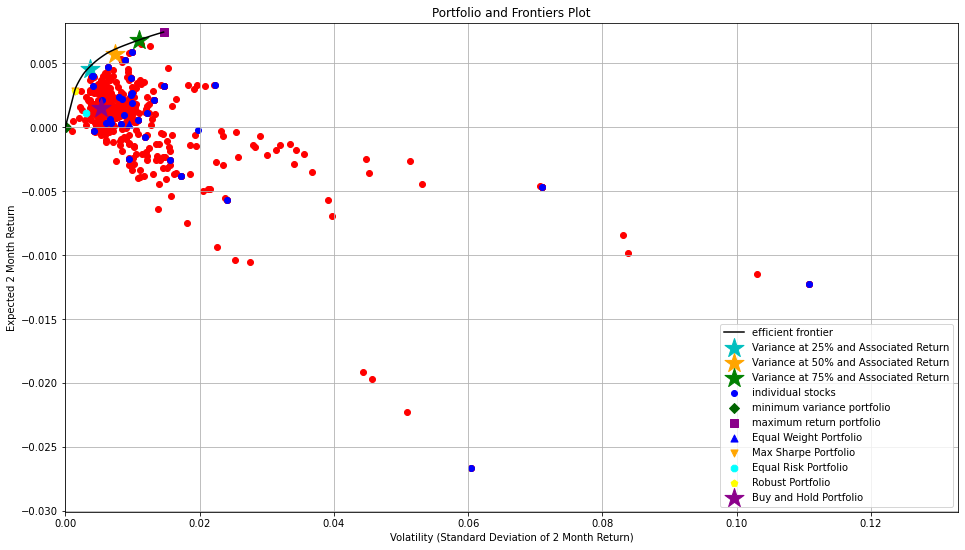

[ 0. 56.  0.  0.  0.  0. 63.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0. 69.  0.  0.  0.  0.  0. 39.  0.  0.  0.]
[  0.   0.   0.   0.   0.   0.  48.   0.   0.   0.   0.  22.   0.   0.
 256.   0.   0.   0.  12.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   6.   0.   0.   0.   0.   0.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  99.   0.   0.
 165.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]

Period 11: start date 11/01/2019, end date 11/29/2019
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 10084.40, value end = $ 10473.65
Before Cash_Optimization] -6398.592719078064
After Cash Optimization 8.234245300292969
[ 6.  6. 10.  7.  6.  6. 12. 10.  4.  9.  7.  8.  3. 15.  6.  9.  6.  6.
  6.  5.  6.  6.  6.  6.  6.  8.  6.  6.  4.  6.  7.  6.  6.  6.  2.]
  Strategy "Equally Weighted

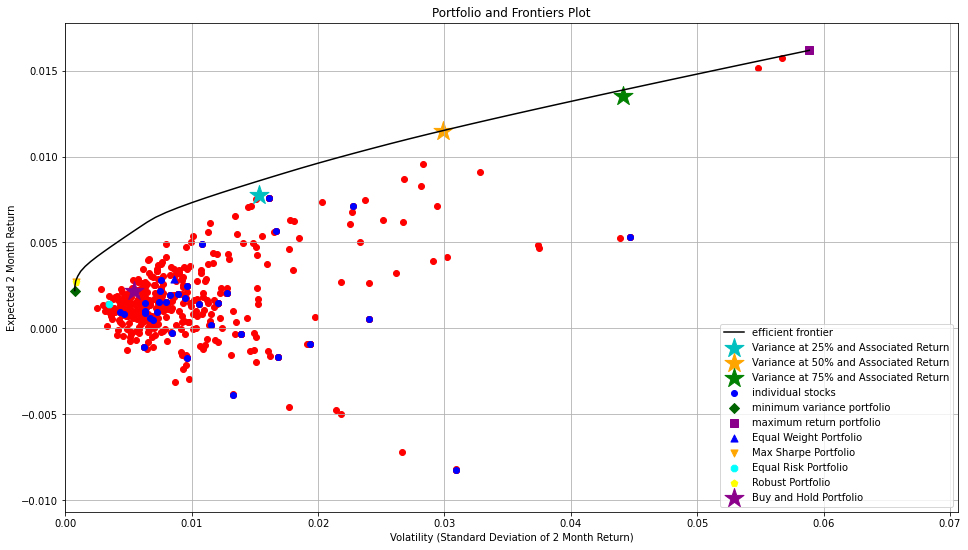

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   7.   0.   0.   0.  33.
   0.   0.   0.   0. 287.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   4.   0.   0.   0.   0.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 196.
   0.   0.   0.   0. 184.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.   0.   0. 317.
   0.   0.   0.   0.  70.   0.   0.   0.   0.   0.   0.   1.   0.   0.
   0.   0.   0.   0.   1.   0.   0.]

Period 12: start date 12/02/2019, end date 12/31/2019
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 10414.22, value end = $ 10524.44
Before Cash_Optimization] -6639.555624008179
After Cash Optimization 26.042064666748104
[ 6.  6. 10.  7.  6.  6. 12. 10.  4. 10.  7.  7.  3. 15.  6.  9.  6.  6.
  6.  5.  6.  6.  6.  6.  6.  8.  6.  6.  4.  6.  7.  6.  6. 

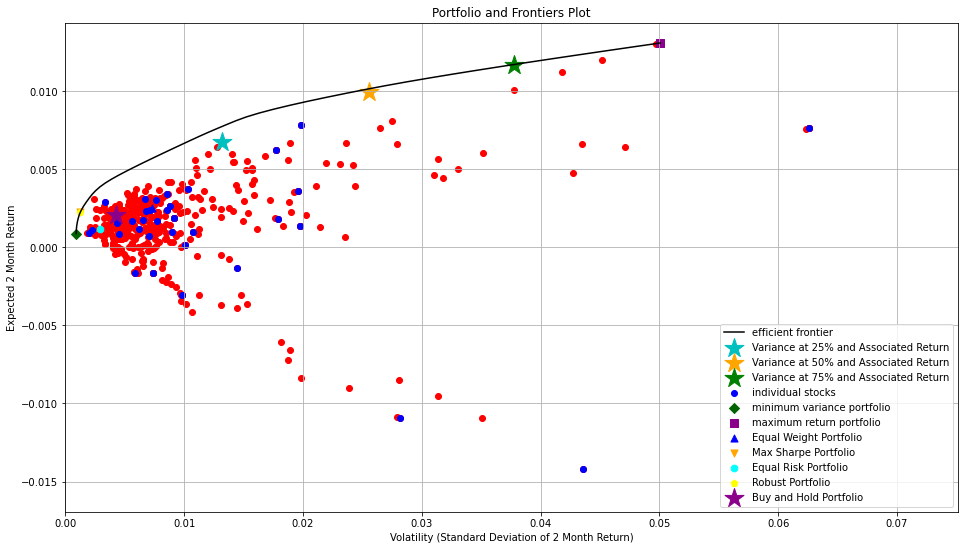

[ 0.  0.  0.  0.  1. 80.  0.  0.  0.  0.  0. 72.  1. 60.  0.  0.  1.  0.
  0.  0. 10.  0.  0.  0.  0.  0. 20.  0.  0.  0.  0.  0.  2.  0.  0.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  74.   0. 166.
   0.   0.  27.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  38.   0. 270.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]

Period 13: start date 01/02/2020, end date 01/31/2020
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 10587.72, value end = $ 10753.64
Before Cash_Optimization] -6799.425686836243
After Cash Optimization 39.28011322021483
[ 6.  6. 10.  7.  6.  6. 11. 10.  4.  9.  7.  7.  3. 15.  6.  9.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  8.  6.  6.  4.  6.  7.  6.  6.  6.  2.]
  Strategy "Equally Weighted

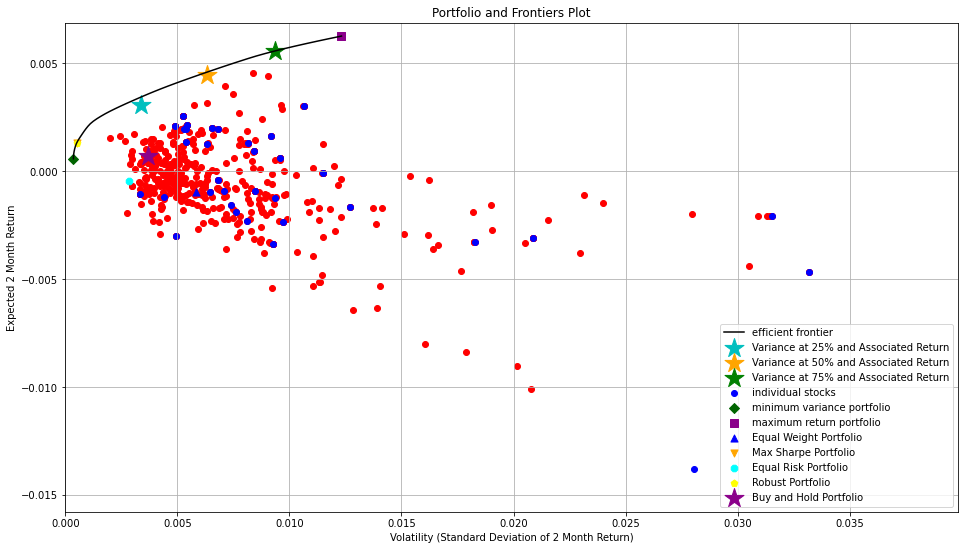

[  0.   0.   0.   0.   0.   6.   0.   0.   0.  15.   0.   0.   2.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  22.   0.   0.   0.   0.   0.
   0. 399.   0.   0.   0.   0.  11.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 328.   0.   0.   0.   0.  24.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 227.   1.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  33.]

Period 14: start date 02/03/2020, end date 02/28/2020
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 10823.81, value end = $ 10616.95
Before Cash_Optimization] -7043.305416941643
After Cash Optimization 39.28011322021486
[ 6.  6. 10.  7.  6.  6. 11. 10.  4.  9.  7.  7.  3. 15.  6.  9.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  8.  6.  6.  4.  6.  7.  6.  6.  

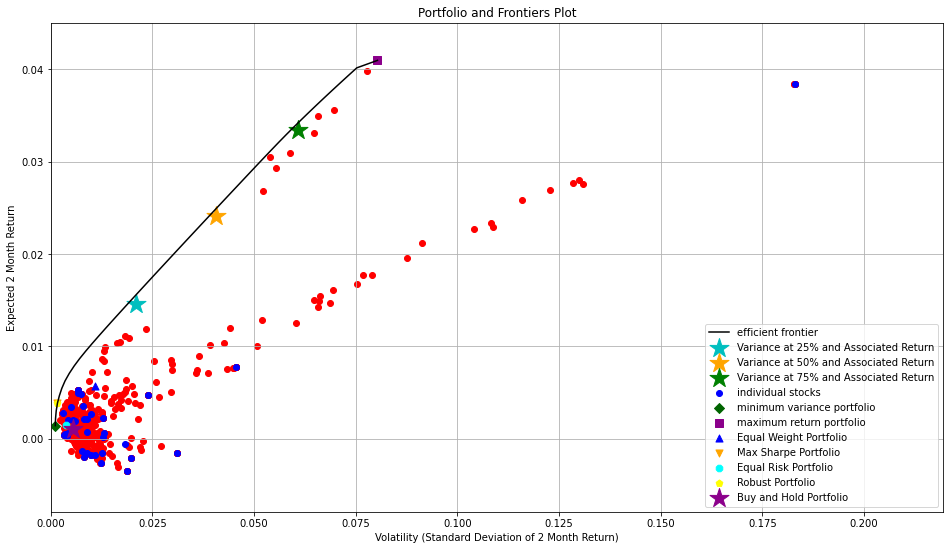

[  5.   0.   0.   6.   0.  11.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  28.  42.   0.   0.   0.   0. 134. 178.   3.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  3.  18.   0.   0.   0.   0.   0.   0.   0.   0.  18.   0.   0.   0.
   0.   0.   0. 193.   0.   0.   0. 249.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   7.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 299.   0.   0.   0. 353.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]

Period 15: start date 03/02/2020, end date 03/31/2020
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 10843.61, value end = $ 8648.45
Before Cash_Optimization] -6631.972585916519
After Cash Optimization 20.71387481689446
[ 6.  6. 10.  7.  6.  6. 12. 10.  5.  9.  7.  7.  3. 15.  6.  9.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  8.  6.  6.  5.  6.  7.  7.  6.  6

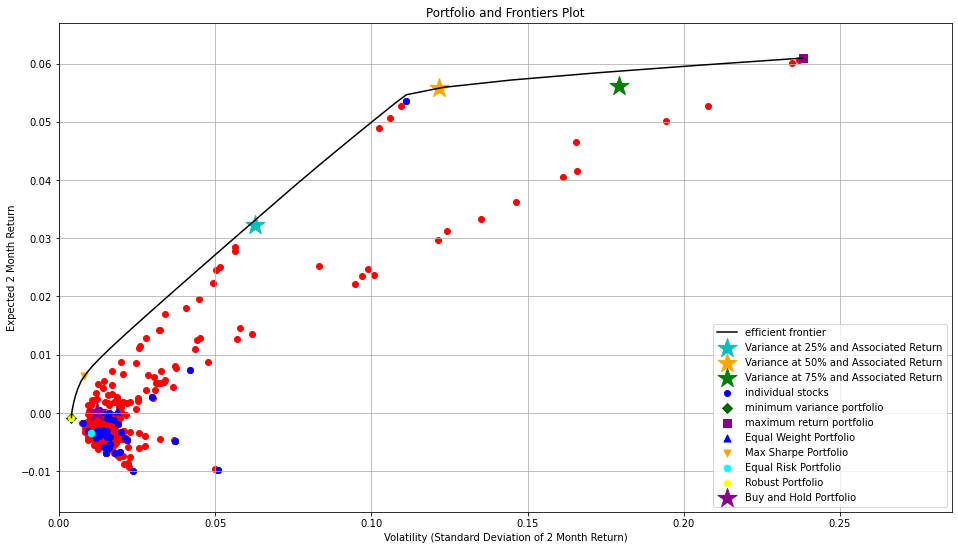

[  0.   5.   0.   0.   0.   0.   0.   0.   0.   2.   0.   0.   4.  98.
   0. 456.   0.   0.   4.   0.  30.  12.   0.   0.   0.   0.   0.   0.
   0.  38.   0.   0.   0.   0.   0.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 605.   0.   0.   0.   0.   0.  68.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   1.   0.
   0. 210.   1.   0.   0.   0.   0. 162.   0.   0.   0.   0.   0.   0.
   0.   0.   1.   0.   0.   0.   0.]

Period 16: start date 04/01/2020, end date 04/30/2020
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 8171.11, value end = $ 9694.54
Before Cash_Optimization] -5008.35033082962
After Cash Optimization 19.011394500732422
[ 6.  6.  8.  7.  6.  6. 12. 10.  7.  7.  7.  8.  3. 13.  6.  9.  6.  6.
  6.  7.  6.  6.  6.  6.  9.  8.  6.  6.  5.  6.  6.  6.  7.  6.

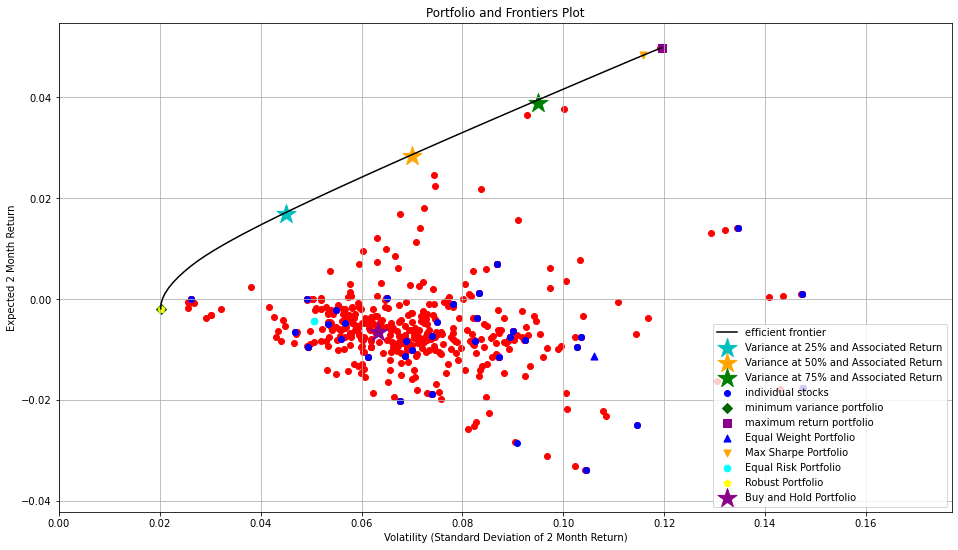

[  0. 652.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
   0. 378.   0.   0.   0.   0.   0.]
[   0. 1101.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.  239.    0.    0.    0.    0.    0.]
[   0. 1450.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.   61.    0.    0.    0.    0.    0.    0.   22.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]

Period 17: start date 05/01/2020, end date 05/29/2020
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 9442.50, value end = $ 10632.97
Before Cash_Optimization] -5927.5527992248535
After Cash Optimization 11.378143310546932
[ 6.  6.  8.  8.  6.  6. 12. 10.  7.  8.  7.  8.  3. 11.  6.  9.

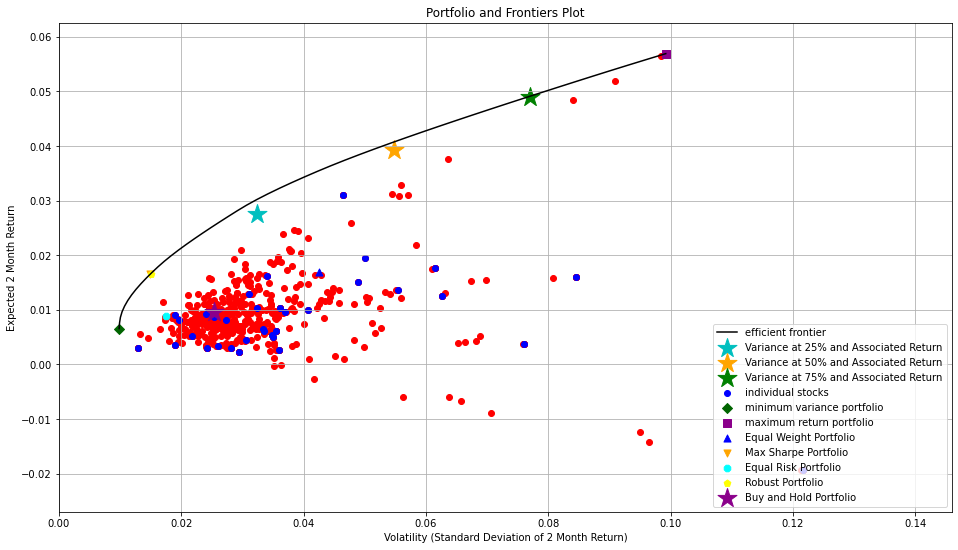

[  0.   0.   0.   0.   0.   1.  88.   0.   0.   0.   0.   0.   0. 117.
   0.   0.   0. 121.   0.   0.  27.   0.   0.   0.   0.   0.   0.   8.
   0.   0.   0.   2.   0.   0.   0.]
[  0.   0.   0.   0.   0.   0. 223.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 240.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  0.   0.   0.   0.   0.   0.  99.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 521.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]

Period 18: start date 06/01/2020, end date 06/30/2020
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 10690.01, value end = $ 11320.67
Before Cash_Optimization] -6560.8228278160095
After Cash Optimization 36.01696395874024
[ 6.  6.  8.  8.  6.  6. 12. 10.  7.  9.  7.  9.  3.  8.  6.  9.  6.  6.
  6.  6.  6.  6.  6.  6.  9. 10.  6.  6.  5.  6.  6.  6.  7. 

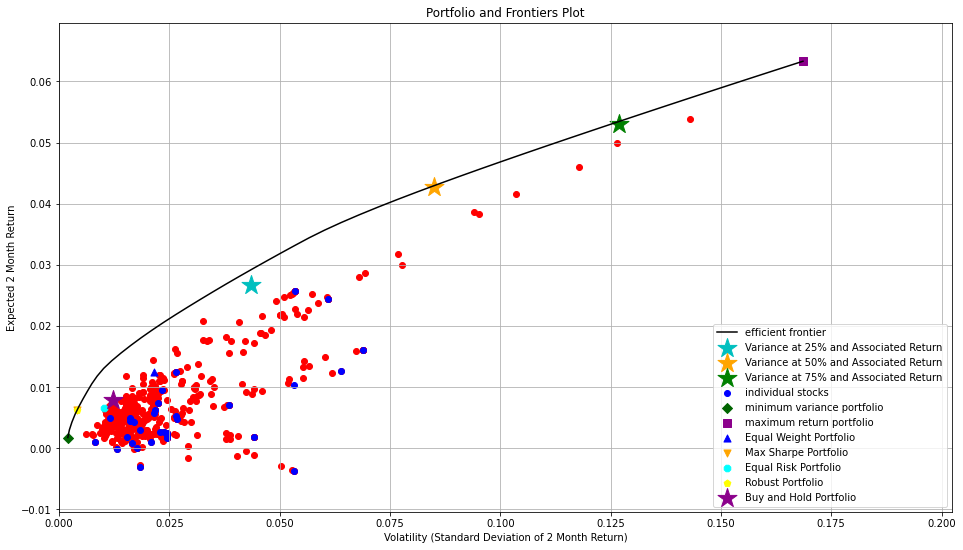

[  0. 373.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0. 105.
   0.  28.   2.   0.   0.   0.   0.   0.   0.   9.   0.   0.   0.   3.
   0.  27.   0.   6.   0.   0.   0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 93.  0. 86.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[  9.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  40.
   0. 141.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]

Period 19: start date 07/02/2020, end date 07/31/2020
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
  Strategy "Buy and Hold", value begin = $ 11394.36, value end = $ 13040.95
Before Cash_Optimization] -7218.399444580078
After Cash Optimization 43.21781539916992
[ 6.  6.  8.  9.  6.  6. 12. 10.  7. 10.  7.  9.  4.  7.  6.  6.  6.  6.
  6.  7.  6.  6.  6.  6.  9. 10.  6.  6.  5.  6.  6.  6.  7.  6.  1.]
  Strategy "Equally Weighted

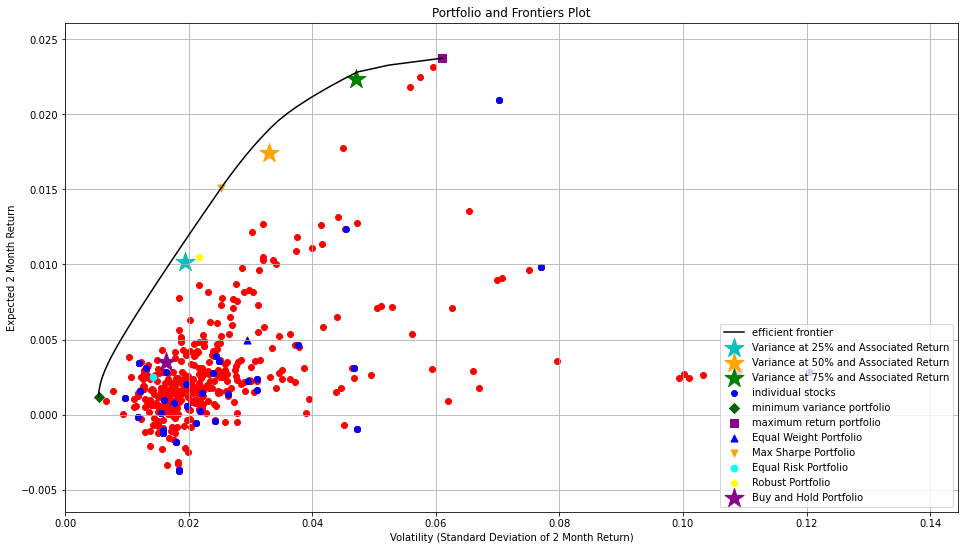

[  0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   3.   7.  27.
  45.  38.   0.   0.   0.   0.   0.   0.  10.   2.   4.   0.   0.   0.
   0. 153.   2.   0.   0.   0.   1.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 11.  0.  0.  0. 55.  0. 71.  0.  0.
  0.  1. 23.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  64.   0. 165.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]

Period 20: start date 08/04/2020, end date 08/18/2020
0
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
Before Cash_Optimization] -8491.536920309067
After Cash Optimization 21.098510742187514
[ 6.  6.  8. 11.  6.  6. 12. 10.  8. 11.  7. 11.  4.  4.  6.  4.  6.  7.
  6.  8.  6.  6.  6.  6.  9. 10.  6.  6.  6.  6.  7.  6.  8.  6.  1.]
Before Cash_Optimization] 219.1609468460092
After Cash Optimization 54.3609437942514
[  0.   4.   0.   

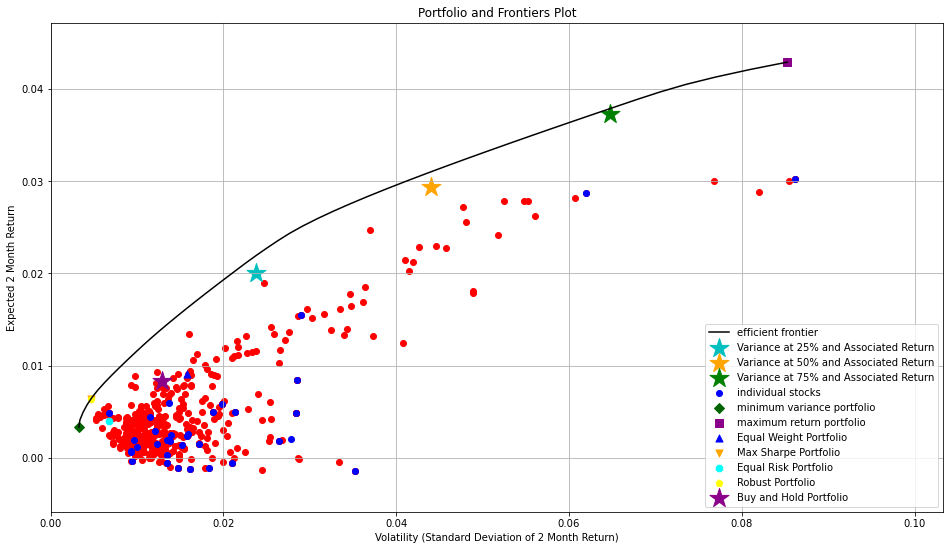

[ 37.   0.   0.   0.   0.   0.   7.   0.   0.   0.   6.   0.   0.  12.
  77.   0.   0.  33.   6.   0. 360.   0.   0.   0.   0.   1.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  0.   0.   0.   3.   0.   0.   0.   0.   4.   0.   0.   0.   0.   0.
   0.   0.   0.  80.   0.   0. 397.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[  0.   0.   0.   0.   0.   0.   0.   0.   6.   0.   0.   0.   0.  10.
   0.  15.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]


In [43]:
equally_weighted_ef_25_list = []
equally_weighted_ef_50_list = []
equally_weighted_ef_75_list = []

for period in range(1, N_periods+1):
    # Compute current year and month, first and last day of the period
    
    if dates_array[0, 0] == 2019:
        cur_year  = 2019 + math.floor(period/13)
    else:
        cur_year  = 2019 + math.floor(period/13)
    
    cur_month = ((period-1)%12) + 1
    
    day_ind_start = min([i for i, val in enumerate((dates_array[:,0] == cur_year) & (dates_array[:,1] == cur_month)) if val])
    day_ind_end = max([i for i, val in enumerate((dates_array[:,0] == cur_year) & (dates_array[:,1] == cur_month)) if val])
    print('\nPeriod {0}: start date {1}, end date {2}'.format(period, dates[day_ind_start], dates[day_ind_end]))
   
    # Prices for the current day
    cur_prices = data_prices[day_ind_start,:]
    
    #End Period Prices
    end_prices = data_prices[day_ind_end,:]

    # Execute portfolio selection strategies
    for strategy  in range(N_strat):
        # Get current portfolio positions
        if period == 1:
            curr_positions = init_positions
            curr_cash = 0
            portf_value[strategy] = np.zeros((N_days, 1))
            portf_value[6] = np.zeros((N_days, 1))
            portf_value[7] = np.zeros((N_days, 1))
            portf_value[8] = np.zeros((N_days, 1))
        else:
            curr_positions = x[strategy, period-2]
            curr_cash = cash[strategy, period-2]

        # Compute strategy
        if strategy == 2:
            #print ('starting cash', curr_cash)
            return_min_var = 0
            var_min_var = 0
            x[strategy, period-1], cash[strategy, period-1], return_min_var, var_min_var= fh_array[strategy](curr_positions, curr_cash, mu, Q, cur_prices, number_of_assets)
            print (x[strategy, period-1])
        elif strategy == 1:
            #print ('starting cash', curr_cash)
            return_eq_w = 0
            var_eq_w = 0
            x[strategy, period-1], cash[strategy, period-1], return_eq_w, var_eq_w= fh_array[strategy](curr_positions, curr_cash, mu, Q, cur_prices, number_of_assets)
            print (x[strategy, period-1])
        elif strategy == 3:
            #print ('starting cash', curr_cash)
            return_max_sharpe = 0
            var_max_sharpe = 0
            x[strategy, period-1], cash[strategy, period-1], return_max_sharpe, var_max_sharpe= fh_array[strategy](curr_positions, curr_cash, mu, Q, cur_prices, number_of_assets)
            print (x[strategy, period-1])
        elif strategy == 4:
            #print ('starting cash', curr_cash)
            return_eq_risk = 0
            var_eq_risk = 0
            x[strategy, period-1], cash[strategy, period-1], return_eq_risk, var_eq_risk= fh_array[strategy](curr_positions, curr_cash, mu, Q, cur_prices, number_of_assets)
            print (x[strategy, period-1])
        elif strategy == 5:
            #print ('starting cash', curr_cash)
            return_rob = 0
            var_rob = 0
            if period == 16 or period == 15:
                x[strategy, period-1], cash[strategy, period-1], return_rob, var_rob = fh_array[strategy](curr_positions, curr_cash, mu, Q, cur_prices, return_min_var, number_of_assets)
            else:
                x[strategy, period-1], cash[strategy, period-1], return_rob, var_rob = fh_array[strategy](curr_positions, curr_cash, mu, Q, cur_prices, return_max_sharpe, number_of_assets)
            print (x[strategy, period-1])
        elif strategy == 0:
            #print ('starting cash', curr_cash)
            return_bh = 0
            var_bh = 0
            x[strategy, period-1], cash[strategy, period-1], return_bh, var_bh = fh_array[strategy](curr_positions, curr_cash, mu, Q, cur_prices, number_of_assets)  
            print (x[strategy, period-1])
        
        if period == 20:
            pass
        else:
            # Compute portfolio value
            p_values = np.dot(data_prices[day_ind_start:day_ind_end+1,:], x[strategy, period-1]) + cash[strategy, period-1]
            portf_value[strategy][day_ind_start:day_ind_end+1] = np.reshape(p_values, (p_values.size,1))
            print('  Strategy "{0}", value begin = $ {1:.2f}, value end = $ {2:.2f}'.format( strategy_names[strategy], 
                portf_value[strategy][day_ind_start][0], portf_value[strategy][day_ind_end][0]))

    if period == 20:
        init_value = np.dot(data_prices[day_ind_end,:], init_positions)
        w_init = (data_prices[day_ind_end,:] * init_positions.T).T / init_value
        w_init = np.array(w_init)

        ret_max_ret, var_max_ret = max_return_plotting(w_init, mu, Q, cur_prices, number_of_assets)
        ret_min_var, var_min_var = min_return_plotting(w_init, mu, Q, cur_prices, number_of_assets)
        
        equally_weighted_ef_25, equally_weighted_ef_50, equally_weighted_ef_75 = e_frontier(mu, Q, cur_prices, ret_max_ret, var_max_ret, ret_min_var, var_min_var, return_eq_w, var_eq_w, return_max_sharpe, var_max_sharpe, return_eq_risk, var_eq_risk, return_rob, var_rob, return_bh, var_bh, number_of_assets,  x[1, period-1])
        
        equally_weighted_ef_25_list.append(equally_weighted_ef_25)
        equally_weighted_ef_50_list.append(equally_weighted_ef_50)
        equally_weighted_ef_75_list.append(equally_weighted_ef_75)
        
        if (all(v == 0 for v in equally_weighted_ef_25)==True):
            equally_weighted_ef_25 = equally_weighted_ef_25_list[period-2]
        if (all(v == 0 for v in equally_weighted_ef_50)==True):
            equally_weighted_ef_50 = equally_weighted_ef_50_list[period-2]
        if (all(v == 0 for v in equally_weighted_ef_75)==True):
            equally_weighted_ef_75 = equally_weighted_ef_75_list[period-2]
            
        print(equally_weighted_ef_25)
        print(equally_weighted_ef_50)
        print(equally_weighted_ef_75)
        
        
        p_values_eq_ef_25 = np.dot(data_prices[day_ind_start:day_ind_end+1,:],equally_weighted_ef_25.T) + cash[strategy, period-1]    
        portf_value[6][day_ind_start:day_ind_end+1] = np.reshape(p_values_eq_ef_25, (p_values_eq_ef_25.size,1))
        
        p_values_eq_ef_50 = np.dot(data_prices[day_ind_start:day_ind_end+1,:],equally_weighted_ef_50.T) + cash[strategy, period-1]    
        portf_value[7][day_ind_start:day_ind_end+1] = np.reshape(p_values_eq_ef_50, (p_values_eq_ef_50.size,1))
        
        p_values_eq_ef_75 = np.dot(data_prices[day_ind_start:day_ind_end+1,:],equally_weighted_ef_75.T) + cash[strategy, period-1]    
        portf_value[8][day_ind_start:day_ind_end+1] = np.reshape(p_values_eq_ef_75, (p_values_eq_ef_75.size,1))
        
        #pass
    else:
        init_value = np.dot(data_prices[day_ind_end,:], init_positions)
        w_init = (data_prices[day_ind_end,:] * init_positions.T).T / init_value
        w_init = np.array(w_init)

        ret_max_ret, var_max_ret = max_return_plotting(w_init, mu, Q, cur_prices, number_of_assets)
        ret_min_var, var_min_var = min_return_plotting(w_init, mu, Q, cur_prices, number_of_assets)

        equally_weighted_ef_25, equally_weighted_ef_50, equally_weighted_ef_75 = e_frontier(mu, Q, cur_prices, ret_max_ret, var_max_ret, ret_min_var, var_min_var, return_eq_w, var_eq_w, return_max_sharpe, var_max_sharpe, return_eq_risk, var_eq_risk, return_rob, var_rob, return_bh, var_bh, number_of_assets,  x[1, period-1])
        
        equally_weighted_ef_25_list.append(equally_weighted_ef_25)
        equally_weighted_ef_50_list.append(equally_weighted_ef_50)
        equally_weighted_ef_75_list.append(equally_weighted_ef_75)
        
        if (all(v == 0 for v in equally_weighted_ef_25)==True):
            equally_weighted_ef_25 = equally_weighted_ef_25_list[period-2]
        if (all(v == 0 for v in equally_weighted_ef_50)==True):
            equally_weighted_ef_50 = equally_weighted_ef_50_list[period-2]
        if (all(v == 0 for v in equally_weighted_ef_75)==True):
            equally_weighted_ef_75 = equally_weighted_ef_75_list[period-2]
            
        print(equally_weighted_ef_25)
        print(equally_weighted_ef_50)
        print(equally_weighted_ef_75)

        
        p_values_eq_ef_25 = np.dot(data_prices[day_ind_start:day_ind_end+1,:],equally_weighted_ef_25.T) + cash[strategy, period-1]    
        portf_value[6][day_ind_start:day_ind_end+1] = np.reshape(p_values_eq_ef_25, (p_values_eq_ef_25.size,1))
        
        p_values_eq_ef_50 = np.dot(data_prices[day_ind_start:day_ind_end+1,:],equally_weighted_ef_50.T) + cash[strategy, period-1]    
        portf_value[7][day_ind_start:day_ind_end+1] = np.reshape(p_values_eq_ef_50, (p_values_eq_ef_50.size,1))
        
        p_values_eq_ef_75 = np.dot(data_prices[day_ind_start:day_ind_end+1,:],equally_weighted_ef_75.T) + cash[strategy, period-1]    
        portf_value[8][day_ind_start:day_ind_end+1] = np.reshape(p_values_eq_ef_75, (p_values_eq_ef_75.size,1))

        # Compute expected returns and covariances for the next period
        cur_returns = data_prices[day_ind_start+1:day_ind_end+1,:] / data_prices[day_ind_start:day_ind_end,:] - 1
        mu = np.mean(cur_returns, axis = 0)
        Q = np.cov(cur_returns.T)

        all_prices[strategy, period-1] = cur_prices

In [44]:
print(all(v == 0 for v in equally_weighted_ef_25_list[-2]))

False


### Plotting

In [45]:
#portf_value[1] = portf_value[1][:-4]

In [46]:
#portf_value[0] = portf_value[0][:-4]
#portf_value[2] = portf_value[2][:-4]
#portf_value[3] = portf_value[3][:-4]
#portf_value[4] = portf_value[4][:-4]
#portf_value[5] = portf_value[5][:-4]

In [47]:
#Setup dataframe that holds the returns each day per strategy
df_strategies = pd.DataFrame(portf_value[0][:], columns = ['Buy and Hold']) 
df_strategies['Equally Weighted Portfolio'] = portf_value[1][:]
df_strategies['Mininum Variance Portfolio'] = portf_value[2][:]
df_strategies['Maximum Sharpe Ratio'] = portf_value[3][:]
df_strategies['Equal Risk Contributions Portfolio'] = portf_value[4][:]
df_strategies['Robust Optimization Portfolio'] = portf_value[5][:]
df_strategies['Robust Optimization Portfolio'] = portf_value[5][:]
df_strategies['EF 25% Variance'] = portf_value[6][:]
df_strategies['EF 50% Variance'] = portf_value[7][:]
df_strategies['EF 75% Variance'] = portf_value[8][:]
df_strategies['Date'] = dates
df_strategies = df_strategies.set_index(['Date'])

#df_strategies = df_strategies[:-1]
df_strategies.tail(20)

,Buy and Hold,Equally Weighted Portfolio,Mininum Variance Portfolio,Maximum Sharpe Ratio,Equal Risk Contributions Portfolio,Robust Optimization Portfolio,EF 25% Variance,EF 50% Variance,EF 75% Variance
Date,,,,,,,,,
07/21/2020,12599.074802,11960.183468,13146.412282,9221.086005,17291.470160,18036.626866,14026.240759,17139.928946,17710.397069
07/22/2020,12655.823253,11987.548446,13312.074964,9341.690493,17515.578716,18345.664130,14211.725472,17422.996205,18430.486265
07/23/2020,12479.040134,11866.708431,13342.450886,9135.905615,17262.469784,17905.107608,13958.037200,16970.121658,17682.896402
07/24/2020,12391.175271,11755.224919,13411.255009,8915.152857,17092.543847,17548.885087,13687.843049,16444.811827,17358.606092
07/27/2020,12575.802969,11890.758756,13583.356678,9164.598738,17434.779377,18137.944014,13973.732265,16841.660408,18698.287279
07/28/2020,12621.303447,12002.787513,13620.833637,9478.270949,17599.366095,18608.503790,14396.666316,17633.335039,19148.886926
07/29/2020,12885.766015,12227.273221,13723.562321,9712.583228,17765.981956,18879.019242,14602.260108,17940.742025,19332.577028
07/30/2020,13130.434386,12448.916838,13752.730148,10083.268977,17991.594968,19822.747792,14737.505353,18165.278951,21962.466802
07/31/2020,13040.945546,12332.737798,13746.690193,10018.224803,17909.752935,19665.891246,14692.024755,18132.606278,21638.186498


In [48]:
#Resize plot to make it easier to read
from matplotlib.pyplot import figure
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:"), fig_size

fig_size[0] = 16
fig_size[1] = 10
print ("Current size:"), fig_size

Current size:
Current size:


(None, [16, 10])

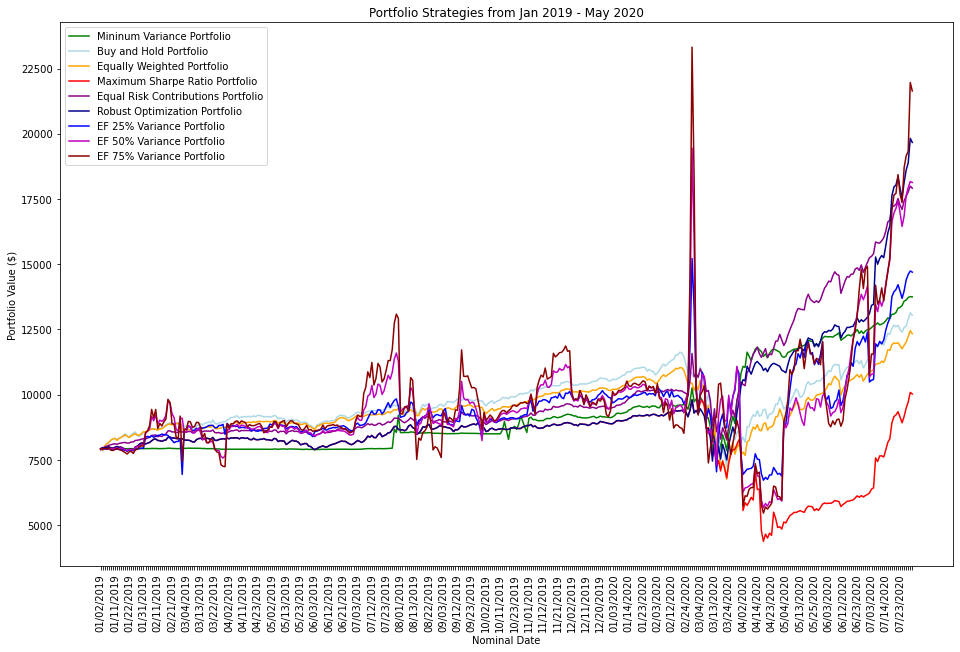

In [49]:
start_date = 0
end_date = -11
ax = plt.gca()
plt.plot(df_strategies['Mininum Variance Portfolio'][start_date:end_date], color = 'Green', label = 'Mininum Variance Portfolio')
plt.plot(df_strategies['Buy and Hold'][start_date:end_date], color = 'LightBlue', label = 'Buy and Hold Portfolio')
plt.plot(df_strategies['Equally Weighted Portfolio'][start_date:end_date], color = 'Orange', label = 'Equally Weighted Portfolio')
plt.plot(df_strategies['Maximum Sharpe Ratio'][start_date:end_date], color = 'Red', label = 'Maximum Sharpe Ratio Portfolio')
plt.plot(df_strategies['Equal Risk Contributions Portfolio'][start_date:end_date], color = 'DarkMagenta', label = 'Equal Risk Contributions Portfolio')
plt.plot(df_strategies['Robust Optimization Portfolio'][start_date:end_date], color = 'DarkBlue', label = 'Robust Optimization Portfolio')
plt.plot(df_strategies['EF 25% Variance'][start_date:end_date], color = 'Blue', label = 'EF 25% Variance Portfolio')
plt.plot(df_strategies['EF 50% Variance'][start_date:end_date], color = 'm', label = 'EF 50% Variance Portfolio')
plt.plot(df_strategies['EF 75% Variance'][start_date:end_date], color = 'DarkRed', label = 'EF 75% Variance Portfolio')



plt.legend()
plt.xlabel('Nominal Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Strategies from Jan 2019 - May 2020')
plt.xticks(rotation = 90)

temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::7]))
for label in temp:
    label.set_visible(False)
plt.show()

#ategies['Equally Weighted Portfolio'] = portf_value[1][:]
#df_strategies['Mininum Variance Portfolio'] = portf_value[2][:]
#df_strategies['Maximum Sharpe Ratio'] = portf_value[3][:]
#df_strategies['Equal Risk Contributions Portfolio'] = portf_value[4][:]
#df_strategies['Robust Optimization Portfolio'] 

plt.show()

In [55]:
#Drawdown Analysis
#print('Highest Gain in Period Percentage of Starting for Equally Weighted (%)')
#print(((np.max(df_strategies['Equally Weighted Portfolio'])/(df_strategies['Equally Weighted Portfolio'][0]))-1)*100)
#print('\n')
drawdown_crash = np.max(df_strategies[250:320]) - np.min(df_strategies[250:320])
rebound_crash = np.max(df_strategies[300:320]) - np.min(df_strategies[300:320])
#print('Drawdown During Crash for Various Portfolio Strategies ($)')
#print(drawdown_crash)
#print('\n')
print('Drawdown Percentage During Crash for Various Portfolio Strategies (%)')
print(drawdown_crash/np.max(df_strategies))
print('\n')
#print('Rebound During Crash for Various Portfolio Strategies ($)')
#print(rebound_crash)
#print('\n')
print('Rebound Percentage During Crash for Various Portfolio Strategies (%)')
print(rebound_crash/drawdown_crash)
print('\n')
print ('Total Return from January 2020 - August 1 2020 (%)')
print((df_strategies.iloc[-12,:]/df_strategies.iloc[-158,:]-1)*100)

Drawdown Percentage During Crash for Various Portfolio Strategies (%)
Buy and Hold                          0.333511
Equally Weighted Portfolio            0.343093
Mininum Variance Portfolio            0.278298
Maximum Sharpe Ratio                  0.420782
Equal Risk Contributions Portfolio    0.184576
Robust Optimization Portfolio         0.183522
EF 25% Variance                       0.544058
EF 50% Variance                       0.678075
EF 75% Variance                       0.754028
dtype: float64


Rebound Percentage During Crash for Various Portfolio Strategies (%)
Buy and Hold                          0.459331
Equally Weighted Portfolio            0.488840
Mininum Variance Portfolio            1.000000
Maximum Sharpe Ratio                  0.638937
Equal Risk Contributions Portfolio    0.919551
Robust Optimization Portfolio         1.000000
EF 25% Variance                       0.492739
EF 50% Variance                       0.365680
EF 75% Variance                       0.26747

In [56]:
df_strategies.iloc[-12,:]

Buy and Hold                          13040.945546
Equally Weighted Portfolio            12332.737798
Mininum Variance Portfolio            13746.690193
Maximum Sharpe Ratio                  10018.224803
Equal Risk Contributions Portfolio    17909.752935
Robust Optimization Portfolio         19665.891246
EF 25% Variance                       14692.024755
EF 50% Variance                       18132.606278
EF 75% Variance                       21638.186498
Name: 07/31/2020, dtype: float64

In [57]:
df_strategies.iloc[-158,:]

Buy and Hold                          10571.168119
Equally Weighted Portfolio            10195.871069
Mininum Variance Portfolio             9192.402104
Maximum Sharpe Ratio                   8930.596174
Equal Risk Contributions Portfolio     9518.613146
Robust Optimization Portfolio          8930.596174
EF 25% Variance                        9719.658553
EF 50% Variance                        9960.984855
EF 75% Variance                        9996.996310
Name: 01/03/2020, dtype: float64

In [58]:
print ('Total Return from April 2020 - August 1 2020 (%)')
print((df_strategies.iloc[-12,:]/df_strategies.iloc[-72,:]-1)*100)

Total Return from April 2020 - August 1 2020 (%)
Buy and Hold                          34.610562
Equally Weighted Portfolio            34.240581
Mininum Variance Portfolio            18.061939
Maximum Sharpe Ratio                  86.927616
Equal Risk Contributions Portfolio    43.418225
Robust Optimization Portfolio         72.207669
EF 25% Variance                       44.106967
EF 50% Variance                       91.110267
EF 75% Variance                       97.557802
dtype: float64


In [59]:
df_strategies.index[-12]

'07/31/2020'

In [60]:
df_strategies.index[-158]

'01/03/2020'

### VFV and XQQ Comparison

In [61]:
#Example1
# download dataframe
#data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")
# download Panel
#data2 = pdr.get_data_yahoo(["SPY", "IWM"], start="2017-01-01", end="2017-04-30")
#example2
#start = datetime.datetime(2017, 1, 1)
#symbol = 'SPY'
#data = pdr.get_data_yahoo(symbol, start=start, end=end)
#data.to_csv("C:\\Users\\Rosario\\Documents\\NeuralNetworksMachineLearning\\LSTMReturnPrediction\\data\\YahooSPY.csv")

#start_date=datetime.datetime(2003, 1, 1)
start_date_training=datetime.datetime(2018, 12, 3)
end_date_training = datetime.datetime.now()
#end_date_training=datetime.datetime(2020, 4, 30)

stock_list = ['XQQ.TO', 'VFV.TO']
#stock_list = ["SPY", "BND", "TLT"]
#stock_list = ["SPY", "TLT"]
#stock_list = ["SPY", "TLT", "SHY"]


stock_str = ""
for i in range(len(stock_list)):
    stock_str  = stock_str + stock_list[i] + "."


#Below is for AP training data download    
main_df = pd.DataFrame()

for stock in range(len(stock_list)):
     df = pdr.get_data_yahoo(stock_list[stock], start=start_date_training, end=end_date_training)
     df.drop(['Close','High', 'Low' , 'Open', 'Volume'], axis=1, inplace=True)
     df.rename(columns={'Adj Close': stock_list[stock]}, inplace=True)
     if main_df.empty:
         main_df = df
     else:
        main_df = main_df.join(df) 
    

main_df.to_csv(stock_str+"AP_train.csv")


#Below is for normal prices training data download 
main_df = pd.DataFrame()

for stock in range(len(stock_list)):
     df = pdr.get_data_yahoo(stock_list[stock], start=start_date_training, end=end_date_training)
     df.drop(['Adj Close','High', 'Low' , 'Open', 'Volume'], axis=1, inplace=True)
     df.rename(columns={'Close': stock_list[stock]}, inplace=True)
     if main_df.empty:
         main_df = df
     else:
        main_df = main_df.join(df) 

main_df.to_csv(stock_str+"train.csv")

In [62]:
dfP_BM = pd.read_csv('XQQ.TO.VFV.TO.train.csv', parse_dates=['Date'])
dfAP_BM = pd.read_csv('XQQ.TO.VFV.TO.AP_train.csv', parse_dates=['Date'])

dfP_BM = dfP_BM.sort_values(by='Date')
dfAP_BM = dfAP_BM.sort_values(by='Date')
#dfP_BM.set_index('Date', inplace = True)
#dfAP_BM.set_index('Date', inplace = True)

In [63]:
init_value_SPY
init_value_BM = init_value_SPY

In [64]:
BM_df = dfAP_BM.copy()
BM_df = BM_df.reset_index()
BM_df = BM_df[19:]
BM_df = BM_df.reset_index()
BM_df = BM_df.drop(['index'], axis=1)
BM_XQQ_positions = np.floor(init_value_BM/BM_df.iloc[0]['XQQ.TO'])
BM_VFV_positions = np.floor(init_value_BM/BM_df.iloc[0]['VFV.TO'])
BM_XQQ_positions = int(BM_XQQ_positions)
BM_VFV_positions = int(BM_VFV_positions)

BM_df['XQQ Portfolio Value'] = BM_df['XQQ.TO']*BM_XQQ_positions
BM_df['VFV Portfolio Value'] = BM_df['VFV.TO']*BM_VFV_positions

In [65]:
print(BM_XQQ_positions)
print(BM_VFV_positions)

155
134


In [66]:
BM_df.tail()

,level_0,Date,XQQ.TO,VFV.TO,XQQ Portfolio Value,VFV Portfolio Value
405,424,2020-08-12,87.870003,79.610001,13619.850426,10667.740082
406,425,2020-08-13,88.040001,79.190002,13646.200142,10611.460327
407,426,2020-08-14,87.919998,79.400002,13627.599716,10639.600204
408,427,2020-08-17,88.879997,79.309998,13776.399574,10627.539673
409,428,2020-08-18,89.809998,79.330002,13920.549622,10630.220245


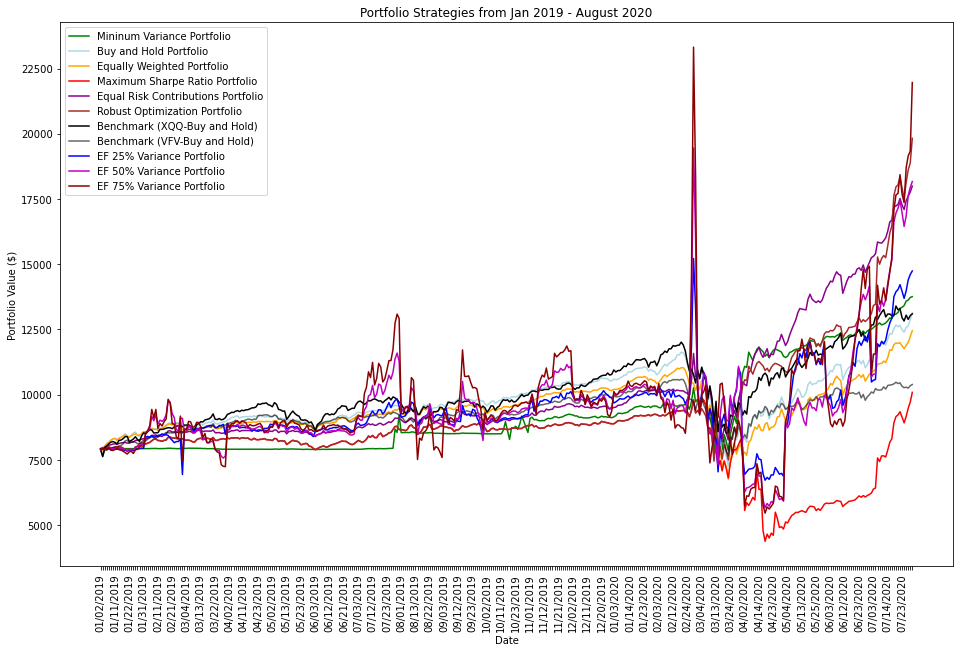

In [80]:
start_date = 0
end_date = -12
ax = plt.gca()
plt.plot(df_strategies['Mininum Variance Portfolio'][start_date:end_date], color = 'Green', label = 'Mininum Variance Portfolio')
plt.plot(df_strategies['Buy and Hold'][start_date:end_date], color = 'LightBlue', label = 'Buy and Hold Portfolio')
plt.plot(df_strategies['Equally Weighted Portfolio'][start_date:end_date], color = 'Orange', label = 'Equally Weighted Portfolio')
plt.plot(df_strategies['Maximum Sharpe Ratio'][start_date:end_date], color = 'Red', label = 'Maximum Sharpe Ratio Portfolio')
plt.plot(df_strategies['Equal Risk Contributions Portfolio'][start_date:end_date], color = 'DarkMagenta', label = 'Equal Risk Contributions Portfolio')
plt.plot(df_strategies['Robust Optimization Portfolio'][start_date:end_date], color = 'Brown', label = 'Robust Optimization Portfolio')
plt.plot(BM_df['XQQ Portfolio Value'][start_date:end_date], color ='k', label = 'Benchmark (XQQ-Buy and Hold)')
plt.plot(BM_df['VFV Portfolio Value'][start_date:end_date], color ='k', label = 'Benchmark (VFV-Buy and Hold)', alpha = 0.6)

plt.plot(df_strategies['EF 25% Variance'][start_date:end_date], color = 'Blue', label = 'EF 25% Variance Portfolio')
plt.plot(df_strategies['EF 50% Variance'][start_date:end_date], color = 'm', label = 'EF 50% Variance Portfolio')
plt.plot(df_strategies['EF 75% Variance'][start_date:end_date], color = 'DarkRed', label = 'EF 75% Variance Portfolio')

plt.legend()
plt.xlabel('Nominal Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Strategies from Jan 2019 - August 2020')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Strategies from Jan 2019 - August 2020')
plt.xticks(rotation = 90)

temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::7]))
for label in temp:
    label.set_visible(False)
plt.show()

#ategies['Equally Weighted Portfolio'] = portf_value[1][:]
#df_strategies['Mininum Variance Portfolio'] = portf_value[2][:]
#df_strategies['Maximum Sharpe Ratio'] = portf_value[3][:]
#df_strategies['Equal Risk Contributions Portfolio'] = portf_value[4][:]
#df_strategies['Robust Optimization Portfolio'] 

plt.show()

In [68]:
#Compute Descriptive Statistics for Trading Strategies
drawdown_crash = np.max(df_strategies[250:334]) - np.min(df_strategies[250:334])
rebound_crash = np.max(df_strategies[300:334]) - np.min(df_strategies[300:334])

strategy_analysis_df = pd.DataFrame((drawdown_crash/np.max(df_strategies))*100)
strategy_analysis_df = strategy_analysis_df.rename(columns={0: "Drawdown Percentage From Crash (%)"})
strategy_analysis_df['Rebound Percentage After Crash (%)'] = rebound_crash/drawdown_crash*100
strategy_analysis_df['Total Return Jan 2020 - August 2020 ($)'] = (df_strategies.iloc[-12,:]/df_strategies.iloc[-158,:]-1)*100

In [69]:
strategy_analysis_df

,Drawdown Percentage From Crash (%),Rebound Percentage After Crash (%),Total Return Jan 2020 - August 2020 ($)
Buy and Hold,33.351115,60.752597,23.363335
Equally Weighted Portfolio,34.309331,62.917095,20.958158
Mininum Variance Portfolio,29.196360,100.000000,49.544048
Maximum Sharpe Ratio,53.801332,71.761107,12.178679
Equal Risk Contributions Portfolio,22.530266,100.000000,88.155067
Robust Optimization Portfolio,19.276671,100.000000,120.208045
EF 25% Variance,55.856650,50.591445,51.157828
EF 50% Variance,70.900002,39.334762,82.036280
EF 75% Variance,76.612088,27.903565,116.446879


In [70]:
BM_df

,level_0,Date,XQQ.TO,VFV.TO,XQQ Portfolio Value,VFV Portfolio Value
0,19,2019-01-02,50.808640,58.996696,7875.339127,7905.557327
1,20,2019-01-03,49.155277,57.046394,7619.067974,7644.216843
2,21,2019-01-04,51.323460,58.694397,7955.136242,7865.049194
3,22,2019-01-07,51.838276,58.655396,8034.932766,7859.822998
4,23,2019-01-08,52.343193,59.113724,8113.194923,7921.238983
...,...,...,...,...,...,...
405,424,2020-08-12,87.870003,79.610001,13619.850426,10667.740082
406,425,2020-08-13,88.040001,79.190002,13646.200142,10611.460327
407,426,2020-08-14,87.919998,79.400002,13627.599716,10639.600204
408,427,2020-08-17,88.879997,79.309998,13776.399574,10627.539673


In [71]:
#Computing Descriptive Statistics for Benchmark Portfolios

drawdown_crash_BM_XQQ = np.max(BM_df['XQQ Portfolio Value'][250:334]) - np.min(BM_df['XQQ Portfolio Value'][250:334])
rebound_crash_BM_XQQ = np.max(BM_df['XQQ Portfolio Value'][300:334]) - np.min(BM_df['XQQ Portfolio Value'][300:334])
rebound_crash_BM_XQQ = rebound_crash_BM_XQQ/drawdown_crash_BM_XQQ*100
drawdown_crash_BM_XQQ = drawdown_crash_BM_XQQ/np.max(BM_df['XQQ Portfolio Value'])*100
#total_return_BM_XQQ = (BM_df['XQQ Portfolio Value'][-10]/BM_df['XQQ Portfolio Value'][-156]-1)*100
total_return_BM_XQQ = (BM_df.iloc[-12,4]/BM_df.iloc[-158,4]-1)*100




drawdown_crash_BM_VFV = np.max(BM_df['VFV Portfolio Value'][250:334]) - np.min(BM_df['VFV Portfolio Value'][250:334])
rebound_crash_BM_VFV = np.max(BM_df['VFV Portfolio Value'][300:334]) - np.min(BM_df['VFV Portfolio Value'][300:334])
rebound_crash_BM_VFV = rebound_crash_BM_VFV/drawdown_crash_BM_VFV*100
drawdown_crash_BM_VFV = drawdown_crash_BM_VFV/np.max(BM_df['VFV Portfolio Value'])*100
total_return_BM_VFV = (BM_df.iloc[-12,5]/BM_df.iloc[-158,5]-1)*100



drawdown_crash_BM_all = [drawdown_crash_BM_XQQ, drawdown_crash_BM_VFV]
rebound_crash_BM_all = [rebound_crash_BM_XQQ, rebound_crash_BM_VFV]
total_return_BM_all = [total_return_BM_XQQ, total_return_BM_VFV]

index_BM = ['XQQ Benchmark Portfolio', 'VFV Benchmark Portfolio']

strategy_analysis_BM_df = pd.DataFrame({'Drawdown Percentage From Crash (%)':drawdown_crash_BM_all, 'Rebound Percentage After Crash (%)':rebound_crash_BM_all, 'Total Return Jan 2020 - August 2020 ($)':total_return_BM_all, 'Index':index_BM})

strategy_analysis_BM_df = strategy_analysis_BM_df.set_index('Index')

In [72]:
print ('XQQ Total Return from April 2020 - August 1 2020 (%)')
print((BM_df.iloc[-12,4]/BM_df.iloc[-74,4]-1)*100)

print ('VFV Total Return from April 2020 - August 1 2020 (%)')
print((BM_df.iloc[-12,5]/BM_df.iloc[-74,5]-1)*100)

XQQ Total Return from April 2020 - August 1 2020 (%)
22.980873811210145
VFV Total Return from April 2020 - August 1 2020 (%)
9.866363194027961


In [73]:
strategy_analysis_BM_df

,Drawdown Percentage From Crash (%),Rebound Percentage After Crash (%),Total Return Jan 2020 - August 2020 ($)
Index,,,
XQQ Benchmark Portfolio,25.089109,70.934828,22.525391
VFV Benchmark Portfolio,27.187967,68.465500,5.188185


In [74]:
strategy_analysis_df = pd.concat([strategy_analysis_df, strategy_analysis_BM_df])

In [75]:
strategy_analysis_df

,Drawdown Percentage From Crash (%),Rebound Percentage After Crash (%),Total Return Jan 2020 - August 2020 ($)
Buy and Hold,33.351115,60.752597,23.363335
Equally Weighted Portfolio,34.309331,62.917095,20.958158
Mininum Variance Portfolio,29.196360,100.000000,49.544048
Maximum Sharpe Ratio,53.801332,71.761107,12.178679
Equal Risk Contributions Portfolio,22.530266,100.000000,88.155067
Robust Optimization Portfolio,19.276671,100.000000,120.208045
EF 25% Variance,55.856650,50.591445,51.157828
EF 50% Variance,70.900002,39.334762,82.036280
EF 75% Variance,76.612088,27.903565,116.446879
XQQ Benchmark Portfolio,25.089109,70.934828,22.525391


### Plot Descriptive Statistics

Text(0.5, 1.0, 'Drawdown Percentage From Crash for Various Portfolios')

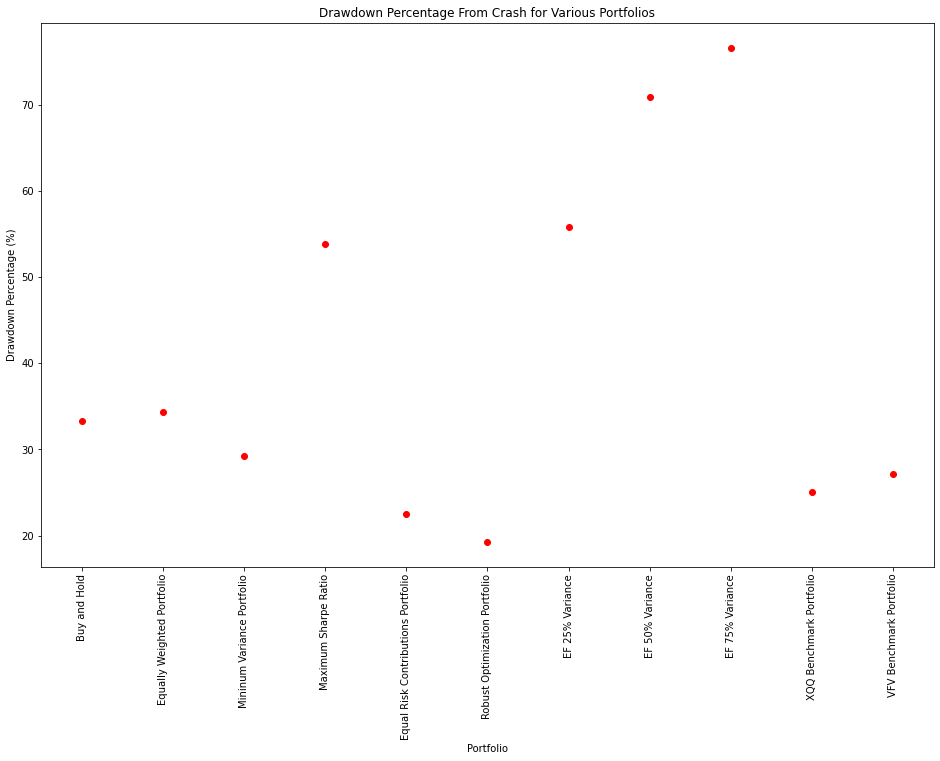

In [76]:
plt.scatter(x=strategy_analysis_df.index, y =strategy_analysis_df['Drawdown Percentage From Crash (%)'], color = 'Red')
plt.xticks(rotation = 90)
plt.xlabel('Portfolio')
plt.ylabel('Drawdown Percentage (%)')
plt.title('Drawdown Percentage From Crash for Various Portfolios')

Text(0.5, 1.0, 'Rebound Percentage for Various Portfolios After Crash')

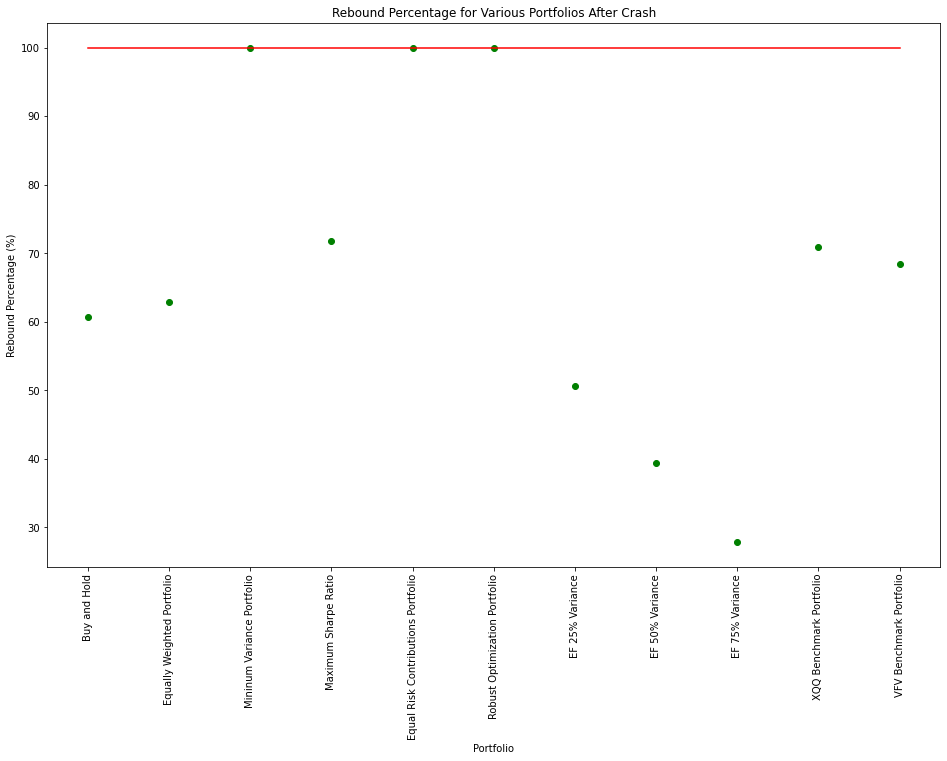

In [77]:
plt.scatter(x=strategy_analysis_df.index, y =strategy_analysis_df['Rebound Percentage After Crash (%)'], color = 'Green')

#Breakeven Line
x_values = [strategy_analysis_df.index[0], strategy_analysis_df.index[-1]]
y_values = [100, 100]
plt.plot(x_values, y_values, color = 'Red')

plt.xticks(rotation = 90)
plt.xlabel('Portfolio')
plt.ylabel('Rebound Percentage (%)')
plt.title('Rebound Percentage for Various Portfolios After Crash')

Text(0.5, 1.0, 'Total Portfolio Value Gain Percentage From January 2020 - May 2020 (%)')

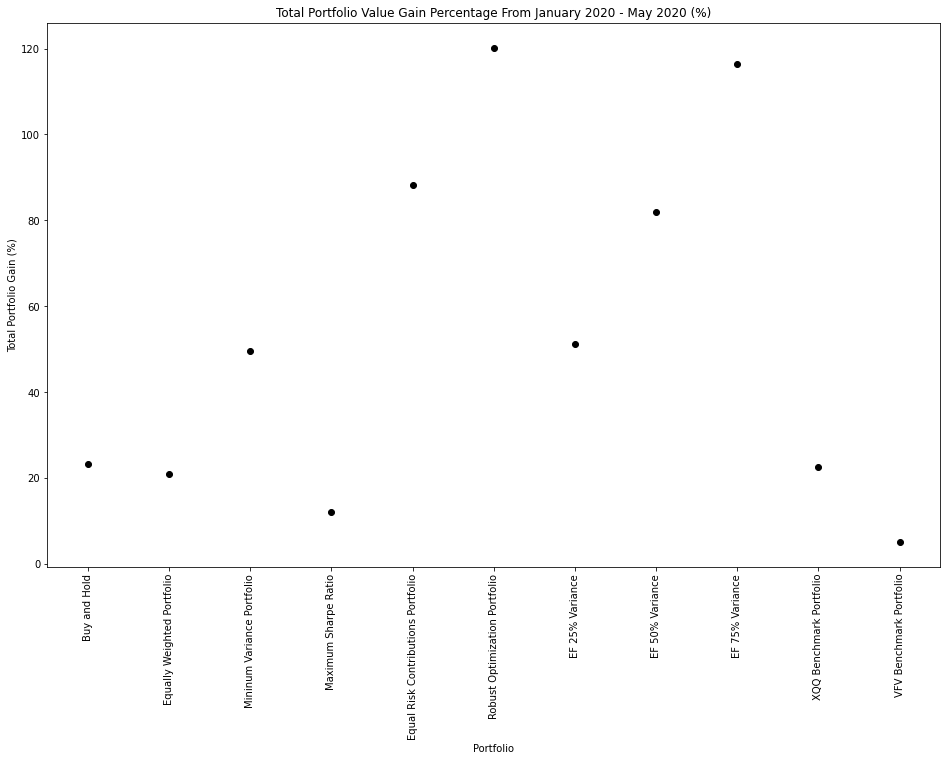

In [78]:
plt.scatter(x=strategy_analysis_df.index, y =strategy_analysis_df['Total Return Jan 2020 - August 2020 ($)'], color = 'k')
plt.xticks(rotation = 90)
plt.xlabel('Portfolio')
plt.ylabel('Total Portfolio Gain (%)')
plt.title('Total Portfolio Value Gain Percentage From January 2020 - May 2020 (%)')

### Check May 2020 Performance

In [524]:
df_may_positions = pd.read_csv('May_2020_portfolio_positions_smaller_pool_capital.csv')
df_may_positions = df_may_positions.set_index('Unnamed: 0')
#df_may_positions = df_may_positions[:-5]

In [525]:
df_may_positions = df_may_positions.astype('float')

In [526]:
df_may_positions

In [527]:
#Example1
# download dataframe
#data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")
# download Panel
#data2 = pdr.get_data_yahoo(["SPY", "IWM"], start="2017-01-01", end="2017-04-30")
#example2
#start = datetime.datetime(2017, 1, 1)
#symbol = 'SPY'
#data = pdr.get_data_yahoo(symbol, start=start, end=end)
#data.to_csv("C:\\Users\\Rosario\\Documents\\NeuralNetworksMachineLearning\\LSTMReturnPrediction\\data\\YahooSPY.csv")

#start_date=datetime.datetime(2003, 1, 1)
start_date_training=datetime.datetime(2020, 5, 1)
end_date_training = datetime.datetime.now()
#end_date_training=datetime.datetime(2020, 4, 30)

stock_list = ['ZUH.TO', 'XIT.TO', 'XQQ.TO','ZWB.TO', 'XRE.TO', 'XBI', 'VFV.TO', 'ZAG.TO', 'XGD.TO']
#stock_list = ["SPY", "BND", "TLT"]
#stock_list = ["SPY", "TLT"]
#stock_list = ["SPY", "TLT", "SHY"]


stock_str = ""
for i in range(len(stock_list)):
    stock_str  = stock_str + stock_list[i] + "."


#Below is for AP training data download    
main_df = pd.DataFrame()

for stock in range(len(stock_list)):
     df = pdr.get_data_yahoo(stock_list[stock], start=start_date_training, end=end_date_training)
     df.drop(['Close','High', 'Low' , 'Open', 'Volume'], axis=1, inplace=True)
     df.rename(columns={'Adj Close': stock_list[stock]}, inplace=True)
     if main_df.empty:
         main_df = df
     else:
        main_df = main_df.join(df) 
    

main_df.to_csv(stock_str+"AP_train_current.csv")


#Below is for normal prices training data download 
main_df = pd.DataFrame()

for stock in range(len(stock_list)):
     df = pdr.get_data_yahoo(stock_list[stock], start=start_date_training, end=end_date_training)
     df.drop(['Adj Close','High', 'Low' , 'Open', 'Volume'], axis=1, inplace=True)
     df.rename(columns={'Close': stock_list[stock]}, inplace=True)
     if main_df.empty:
         main_df = df
     else:
        main_df = main_df.join(df) 

main_df.to_csv(stock_str+"train_current.csv")

In [528]:
dfP_current = pd.read_csv('ZUH.TO.XIT.TO.XQQ.TO.ZWB.TO.XRE.TO.XBI.VFV.TO.ZAG.TO.XGD.TO.train_current.csv', parse_dates=['Date'])
dfAP_current = pd.read_csv('ZUH.TO.XIT.TO.XQQ.TO.ZWB.TO.XRE.TO.XBI.VFV.TO.ZAG.TO.XGD.TO.AP_train_current.csv', parse_dates=['Date'])

dfP_current = dfP_current.sort_values(by='Date')
dfAP_current = dfAP_current.sort_values(by='Date')
dfP_current.set_index('Date', inplace = True)
dfAP_current.set_index('Date', inplace = True)

In [529]:
dfAP_current.tail()

In [530]:
df_may_positions.head(12)

In [531]:
buy_and_hold = dfAP_current.copy()
equally_weighted = dfAP_current.copy()
minimum_var = dfAP_current.copy()
max_sharpe = dfAP_current.copy()
equal_risk = dfAP_current.copy()
robust_opt = dfAP_current.copy()
ef_25_var = dfAP_current.copy()
ef_50_var = dfAP_current.copy()
ef_75_var = dfAP_current.copy()
bm_xqq = dfAP_current.copy()
bm_vfv = dfAP_current.copy()

In [532]:
buy_and_hold = buy_and_hold*df_may_positions.iloc[0,:]
buy_and_hold['Total Portfolio Value'] = buy_and_hold.sum(axis = 1)

equally_weighted = equally_weighted*df_may_positions.iloc[1,:]
equally_weighted['Total Portfolio Value'] = equally_weighted.sum(axis = 1)

minimum_var = minimum_var*df_may_positions.iloc[2,:]
minimum_var['Total Portfolio Value'] = minimum_var.sum(axis = 1)

max_sharpe = max_sharpe*df_may_positions.iloc[3,:]
max_sharpe['Total Portfolio Value'] = max_sharpe.sum(axis = 1)

equal_risk = equal_risk*df_may_positions.iloc[4,:]
equal_risk['Total Portfolio Value'] = equal_risk.sum(axis = 1)

robust_opt = robust_opt*df_may_positions.iloc[5,:]
robust_opt['Total Portfolio Value'] = robust_opt.sum(axis = 1)

ef_25_var = ef_25_var*df_may_positions.iloc[6,:]
ef_25_var['Total Portfolio Value'] = ef_25_var.sum(axis = 1)

ef_50_var = ef_50_var*df_may_positions.iloc[7,:]
ef_50_var['Total Portfolio Value'] = ef_50_var.sum(axis = 1)

ef_75_var = ef_75_var*df_may_positions.iloc[8,:]
ef_75_var['Total Portfolio Value'] = ef_75_var.sum(axis = 1)

bm_xqq = bm_xqq*df_may_positions.iloc[9,:]
bm_xqq['Total Portfolio Value'] = bm_xqq.sum(axis = 1)

bm_vfv = bm_vfv*df_may_positions.iloc[10,:]
bm_vfv['Total Portfolio Value'] = bm_vfv.sum(axis = 1)

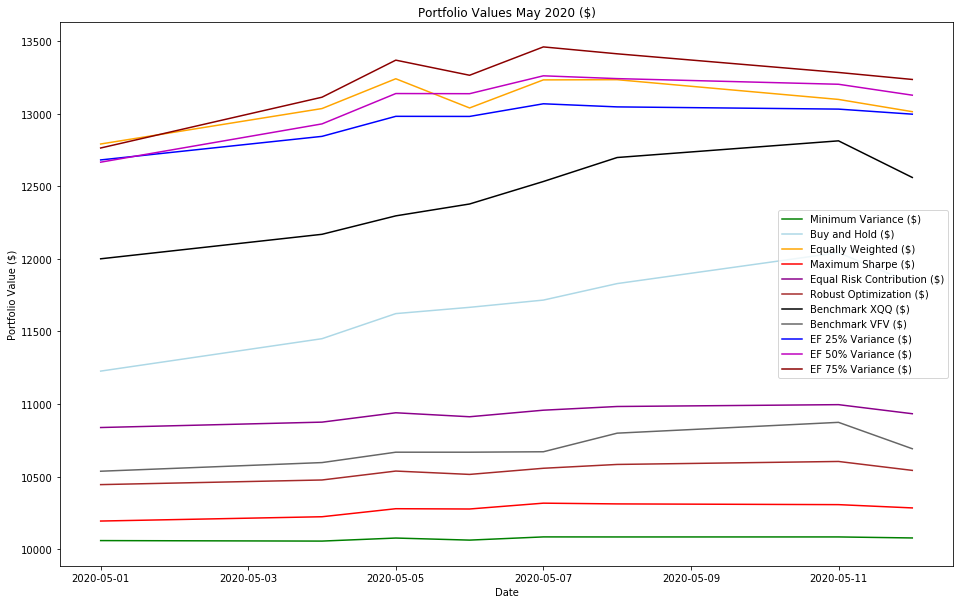

In [533]:
plt.plot(minimum_var['Total Portfolio Value'], color = 'Green', label = 'Minimum Variance ($)')
plt.plot(buy_and_hold['Total Portfolio Value'], color = 'LightBlue', label = 'Buy and Hold ($)')
plt.plot(equally_weighted['Total Portfolio Value'], color ='Orange', label = 'Equally Weighted ($)')
plt.plot(max_sharpe['Total Portfolio Value'], color = 'r', label = 'Maximum Sharpe ($)')
plt.plot(equal_risk['Total Portfolio Value'], color = 'DarkMagenta', label = 'Equal Risk Contribution ($)')
plt.plot(robust_opt['Total Portfolio Value'], color = 'Brown', label = 'Robust Optimization ($)')
plt.plot(bm_xqq['Total Portfolio Value'], color = 'k', label = 'Benchmark XQQ ($)')
plt.plot(bm_vfv['Total Portfolio Value'], color ='k', label = 'Benchmark VFV ($)', alpha = 0.6)
plt.plot(ef_25_var['Total Portfolio Value'], color = 'b', label = 'EF 25% Variance ($)')
plt.plot(ef_50_var['Total Portfolio Value'], color = 'm', label = 'EF 50% Variance ($)')
plt.plot(ef_75_var['Total Portfolio Value'], color = 'DarkRed', label = 'EF 75% Variance ($)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Values May 2020 ($)')
plt.legend()

In [534]:
print('Min Var May Change (%) =', (minimum_var['Total Portfolio Value'][-1]/minimum_var['Total Portfolio Value'][0]-1)*100)
print('Buy and Hold May Change (%) =', (buy_and_hold['Total Portfolio Value'][-1]/buy_and_hold['Total Portfolio Value'][0]-1)*100)
print('Equally Weighted May Change (%) =', (equally_weighted['Total Portfolio Value'][-1]/equally_weighted['Total Portfolio Value'][0]-1)*100)
print('Maximum Sharpe May Change (%) =', (max_sharpe['Total Portfolio Value'][-1]/max_sharpe['Total Portfolio Value'][0]-1)*100)
print('Equal Risk Contribution May Change (%) =', (equal_risk['Total Portfolio Value'][-1]/equal_risk['Total Portfolio Value'][0]-1)*100)
print('Robust Optimization May Change (%) =', (robust_opt['Total Portfolio Value'][-1]/robust_opt['Total Portfolio Value'][0]-1)*100)
print('Benchmark XQQ May Change (%) =', (bm_xqq['Total Portfolio Value'][-1]/bm_xqq['Total Portfolio Value'][0]-1)*100)
print('Benchmark VFV May Change (%) =', (bm_vfv['Total Portfolio Value'][-1]/bm_vfv['Total Portfolio Value'][0]-1)*100)
print('EF 25% Variance May Change (%) =', (ef_25_var['Total Portfolio Value'][-1]/ef_25_var['Total Portfolio Value'][0]-1)*100)
print('EF 50% Variance May Change (%) =', (ef_50_var['Total Portfolio Value'][-1]/ef_50_var['Total Portfolio Value'][0]-1)*100)
print('EF 75% Variance May Change (%) =', (ef_75_var['Total Portfolio Value'][-1]/ef_75_var['Total Portfolio Value'][0]-1)*100)

Min Var May Change (%) = 0.1808264858217834
Buy and Hold May Change (%) = 5.39081513741515
Equally Weighted May Change (%) = 1.74113660188977
Maximum Sharpe May Change (%) = 0.8870835097407825
Equal Risk Contribution May Change (%) = 0.8770692810285752
Robust Optimization May Change (%) = 0.9387229944403552
Benchmark XQQ May Change (%) = 4.6686982219982465
Benchmark VFV May Change (%) = 1.4705895044906825
EF 25% Variance May Change (%) = 2.4855833130509097
EF 50% Variance May Change (%) = 3.644289353776964
EF 75% Variance May Change (%) = 3.6992841606891202
